# Table of Contents:
1. [Histograms](#hist)
2. [Clone detection workflow and results](#check)
3. [Implementation](#implementation)

In [893]:
# import all scripts and libraries
import matplotlib.pyplot as plt
import psycopg2

import py.labeled as labeled
import py.statstest as statstest
import py.plotter as plotter
import py.clones as clones
import py.dbinfo as dbinfo
import py.cpnpa as cpnpa
import py.cgraph as cgraph

import importlib

importlib.reload(statstest)
importlib.reload(labeled)
importlib.reload(plotter)
importlib.reload(clones)
importlib.reload(cpnpa)
importlib.reload(cgraph)

<module 'py.cgraph' from '/home/mschen/code/nbooks/py/cgraph.py'>

# Copy and Paste

To study the copy and paste behavior.

We first study the case that a user ask a question, then he used the answer he got to answer other people's questions.
Technically, we find users

Below we eliminate the scenario of a user ansewering his own question.

In [825]:
cpnpa.ask_learn_reuse(filter_str="TRUE")


userid:  411449
ask: http://stackoverflow.com/questions/33005348
answer: http://stackoverflow.com/questions/33576700

userid:  413127
ask: http://stackoverflow.com/questions/6484561
answer: http://stackoverflow.com/questions/6512854

userid:  439581
ask: http://stackoverflow.com/questions/9695796
answer: http://stackoverflow.com/questions/9714485

userid:  569976
ask: http://stackoverflow.com/questions/32161720
answer: http://stackoverflow.com/questions/32167799

userid:  934560
ask: http://stackoverflow.com/questions/29916962
answer: http://stackoverflow.com/questions/29946540

userid:  1178686
ask: http://stackoverflow.com/questions/16662408
answer: http://stackoverflow.com/questions/24617286


## A user posting the same answer

In [895]:
cpnpa.report_a_user_posting_same_answers()

For secure answers:  67 users involove in copying 167 answers.
For insecure answers:48 users involove in copying 113 answers.


In [901]:
# The number of answers each user copied
sorted(cpnpa.ns_answers_user_copied(labeled.is_insecure_answer(), include_uid=True), reverse=True)
#cpnpa.a_user_posting_same_answers(labeled.is_insecure_answer(), print_url=True, tmp_filter="tmp1.auid=608639")

[(9, 4328123),
 (4, 608639),
 (4, 589259),
 (3, 5096868),
 (3, 2413303),
 (3, 1686001),
 (3, 1122476),
 (3, 991737),
 (3, 263004),
 (2, 7268486),
 (2, 7125370),
 (2, 6371459),
 (2, 5256668),
 (2, 4380014),
 (2, 4088963),
 (2, 3837191),
 (2, 3753943),
 (2, 3193318),
 (2, 3040750),
 (2, 3001496),
 (2, 2950618),
 (2, 2732017),
 (2, 2659741),
 (2, 2331953),
 (2, 1945470),
 (2, 1887603),
 (2, 1816580),
 (2, 1794207),
 (2, 1793033),
 (2, 1695532),
 (2, 1624839),
 (2, 1516873),
 (2, 1455719),
 (2, 1379195),
 (2, 1314792),
 (2, 1305725),
 (2, 1293744),
 (2, 1183033),
 (2, 984666),
 (2, 934560),
 (2, 932623),
 (2, 861832),
 (2, 855950),
 (2, 639292),
 (2, 372643),
 (2, 335638),
 (2, 251491),
 (2, 70465)]

In [887]:
cpnpa.a_user_posting_same_answers(labeled.is_insecure_answer(), print_url=False)

213 rows found.


{70465: {26206: [41009420, 42236350], 26412: [41009420, 42236350]},
 251491: {8295: [22445878, 22445904]},
 263004: {4741: [3247929, 4716304, 11092289]},
 335638: {15293: [28062822, 45075925]},
 372643: {1541: [10406233, 10414727]},
 589259: {18616: [8828196, 9232585],
  20900: [8828196, 9232585],
  21031: [8828196, 9232585],
  22240: [8828196, 9232585],
  23594: [8828196, 9232585],
  23666: [31613311, 43426890],
  26621: [8828196, 9232585]},
 608639: {3585: [23317730, 24115112],
  10396: [23365536, 24379185],
  14995: [23365536, 24379185]},
 639292: {20491: [21039407, 21050497]},
 855950: {22026: [19219685, 19219718],
  26063: [19219685, 19219718],
  26299: [19219685, 19219718]},
 861832: {852: [10316509, 13612902]},
 932623: {5438: [26804009, 27706920],
  8054: [26804009, 27706920],
  15933: [26804009, 27706920],
  19644: [26804009, 27706920]},
 934560: {9127: [29946540, 30302235]},
 984666: {1014: [7745075, 8300935]},
 991737: {23689: [22602793, 23837973, 23838209],
  24781: [226027

# Statistical hypothesis testing

I have merged the the labeling into binary classification: secure and insecure (note: the mixed clone group is not included in either of the two). Since there can be many clone instances associating with one answer post, we labeled the clone as secure only when all clone instances belong to the answer post is secure, otherwise the answer post is labeled as insecure.

We study attributes difference between secure group and insecure group (such as the reputations of answerers, score of answers, comment count of answers, etc.)

Mann-Whitney U test is used to do the statistical inference because it does not require the assumption of normal distribution. (As show by the histogram, the attributes are clearly not match normal distribution).

The test shows that, overall, 
The answerers of secure answers have higher reputation and profile views than insecure answers.
The insecure answers have more comment counts than secure answers.

In [731]:
statstest.mwutest(alternative='two-sided')

## All categories:

,secure mean,insecure mean,p-value,Cliff's d,larger (alpha=0.05)
favoritecount,7.7,15.0,0.14,0.04 (negligible),None
commentcount,2.4,3.0,0.03,0.07 (negligible),insecure
profileviews,6605.0,3718.0,0.05,0.06 (negligible),secure
score,5.3,13.6,1.00,0.00 (negligible),None
viewcount,18810.0,36171.0,0.00,0.09 (negligible),insecure
reputation,18637.0,14835.0,0.03,0.07 (negligible),secure


## category SSL/TLS:

,secure mean,insecure mean,p-value,Cliff's d,larger (alpha=0.05)
favoritecount,9.1,18.5,0.87,0.01 (negligible),None
commentcount,1.6,2.9,0.00,0.19 (small),insecure
profileviews,2529.0,4445.0,0.58,0.03 (negligible),None
score,7.0,17.4,0.25,0.06 (negligible),None
viewcount,21688.0,37372.0,0.42,0.05 (negligible),None
reputation,14463.0,15832.0,0.43,0.05 (negligible),None


## category Symmetric Cryptography:

,secure mean,insecure mean,p-value,Cliff's d,larger (alpha=0.05)
favoritecount,7.0,5.9,0.45,0.04 (negligible),None
commentcount,3.1,3.1,0.79,0.02 (negligible),None
profileviews,8724.0,1180.0,0.48,0.04 (negligible),None
score,5.6,7.2,0.33,0.05 (negligible),None
viewcount,16679.0,17184.0,0.11,0.09 (negligible),None
reputation,19467.0,10112.0,0.55,0.03 (negligible),None


## category Asymmetric Cryptography:

,secure mean,insecure mean,p-value,Cliff's d,larger (alpha=0.05)
favoritecount,4.5,2.0,0.84,0.05 (negligible),None
commentcount,1.9,2.2,0.75,0.08 (negligible),None
profileviews,2574.0,3307.0,0.31,0.27 (small),None
score,4.9,5.6,0.16,0.37 (medium),None
viewcount,12436.0,8468.0,0.53,0.17 (small),None
reputation,17521.0,16602.0,0.32,0.26 (small),None


## category One Way Hash Function:

,secure mean,insecure mean,p-value,Cliff's d,larger (alpha=0.05)
favoritecount,8.3,22.9,0.17,0.09 (negligible),None
commentcount,2.3,2.3,0.77,0.02 (negligible),None
profileviews,9829.0,6726.0,0.36,0.07 (negligible),None
score,4.6,14.5,0.20,0.09 (negligible),None
viewcount,21964.0,79877.0,0.07,0.14 (negligible),None
reputation,20966.0,20923.0,0.32,0.07 (negligible),None


## category Random Number Generation:

,secure mean,insecure mean,p-value,Cliff's d,larger (alpha=0.05)
favoritecount,0.4,15.4,0.15,0.35 (medium),None
commentcount,2.9,5.2,0.30,0.28 (small),None
profileviews,5978.0,2325.0,0.34,0.26 (small),None
score,1.3,14.2,0.49,0.19 (small),None
viewcount,999.5,29378.0,0.06,0.50 (large),None
reputation,32328.0,18786.0,0.27,0.30 (small),None


In [ ]:
## size of clone group

In [854]:
statstest.group_size_mw(labeled.is_secure_clninst(), labeled.is_insecure_clninst(), alternative='two-sided')

,p,d,a<b
group size,0.000556833,0.115496,True


# Correlation

In [467]:
repu_view = labeled.attrs('users.reputation, users.views', 
                         labeled.is_secure_answer())
repu_view['Log(users.reputation)'] = np.log(repu_view['users.reputation'])

In [468]:
repu_view.describe()

,users.reputation,users.views,answers.id,Log(users.reputation)
count,756.000000,7.560000e+02,7.560000e+02,756.000000
mean,18847.513228,6.724853e+03,2.609952e+07,7.358463
std,78299.729465,7.838788e+04,1.203805e+07,2.529875
min,1.000000,0.000000e+00,9.924130e+05,0.000000
25%,398.500000,4.300000e+01,1.654227e+07,5.987705
50%,1758.000000,2.005000e+02,2.647477e+07,7.471814
75%,9806.500000,9.202500e+02,3.598211e+07,9.190800
max,990402.000000,1.499608e+06,4.758800e+07,13.805866


In [713]:
def plot_corr(x_attr, y_attr, filter_str, transform_func_x, transform_func_y=None):
    repu_view = labeled.attrs(x_attr+","+y_attr, filter_str)
    if transform_func_y is None:
        transform_func_y = transform_func_x
    x = repu_view[x_attr].apply(transform_func_x)
    y = repu_view[y_attr].apply(transform_func_y)
    ax.scatter(x,y)
    ax.set_xlabel(x_attr)
    ax.set_ylabel(y_attr)
    rho, p = stats.spearmanr(x,y)
    display(Markdown("## Spearman's rho $r_s=$%.2f, p=%.3f" % (rho,p)))

<IPython.core.display.Javascript object>


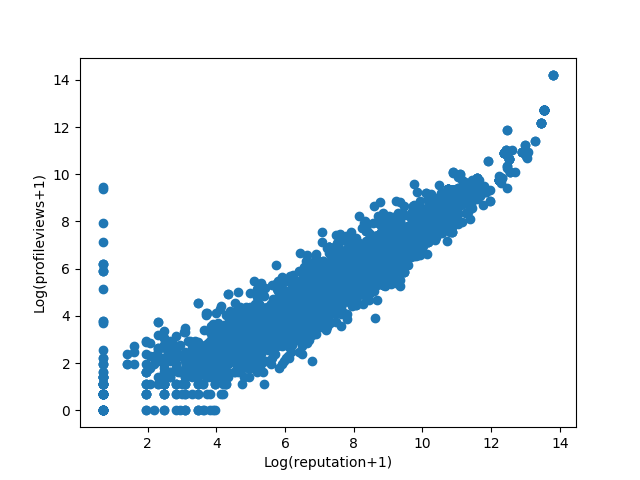

## Spearman's rho $r_s=$0.94, p=0.000

Text(0,0.5,'Log(profileviews+1)')

In [714]:
# correlation between reputation and views
ax = plt.gca()
transform_func_view = lambda val: math.log(val+1)
transform_func_comm= lambda val: val
plot_corr('users.reputation', 'users.views',
          'TRUE', transform_func_view)
ax.set_xlabel("Log(reputation+1)")
ax.set_ylabel("Log(profileviews+1)")

<IPython.core.display.Javascript object>


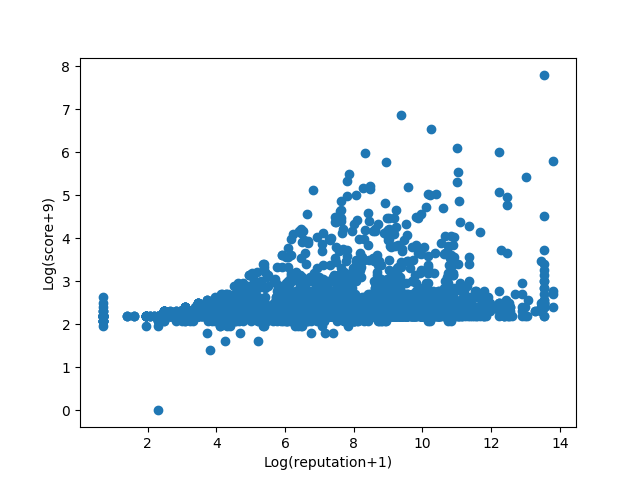

## Spearman's rho $r_s=$0.28, p=0.000

Text(0,0.5,'Log(score+9)')

In [715]:
# correlation between reputation ans score
ax = plt.gca()
transform_func_score = lambda val: math.log(val+9)
transform_func_reputation= lambda val: math.log(val+1)
plot_corr('users.reputation', 'answers.score',
          'TRUE', transform_func_reputation, transform_func_score)
ax.set_xlabel("Log(reputation+1)")
ax.set_ylabel("Log(score+9)")

<IPython.core.display.Javascript object>


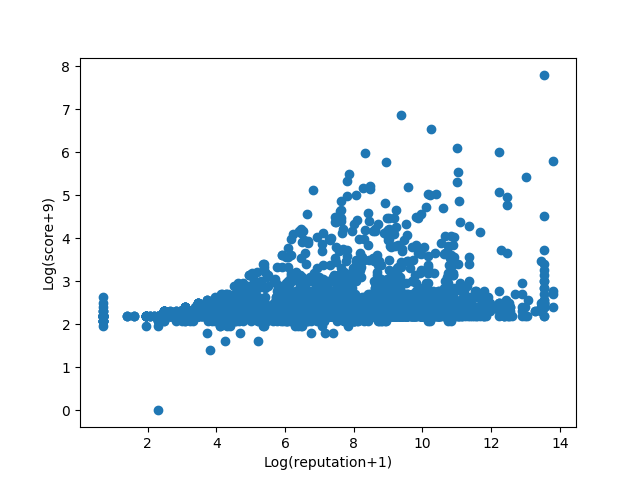

## Spearman's rho $r_s=$0.28, p=0.000

Text(0,0.5,'Log(score+9)')

In [715]:
# correlation between commentcount ans score
ax = plt.gca()
transform_func_score = lambda val: math.log(val+9)
transform_func_reputation= lambda val: math.log(val+1)
plot_corr('users.reputation', 'answers.score',
          'TRUE', transform_func_reputation, transform_func_score)
ax.set_xlabel("Log(reputation+1)")
ax.set_ylabel("Log(score+9)")

<IPython.core.display.Javascript object>


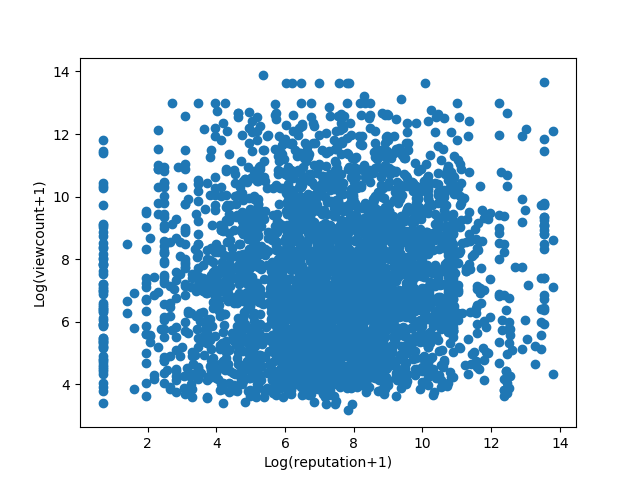

## Spearman's rho $r_s=$0.10, p=0.000

Text(0,0.5,'Log(viewcount+1)')

In [716]:
ax = plt.gca()
transform_func_score = lambda val: math.log(val+9)
transform_func_reputation= lambda val: math.log(val+1)
plot_corr('users.reputation', 'questions.viewcount',
          'TRUE', transform_func_reputation, transform_func_score)
ax.set_xlabel("Log(reputation+1)")
ax.set_ylabel("Log(viewcount+1)")

In [406]:
labeled.attrs('DISTINCT answers.score, answers.id', labeled.is_irrelevant_answer())

2116

In [417]:
len(labeled.uattrs('users.reputation', labeled.is_secure_answer()))

756

In [415]:
tt=[1,2,3,4]
tti = (3,1)
tt[tti]


TypeError: list indices must be integers or slices, not tuple

In [412]:
labeled.no_owner_answers()

[(842587, None),
 (5215804, None),
 (8572520, None),
 (14718710, None),
 (14930763, None),
 (17683740, None),
 (19025940, None),
 (21637580, None),
 (23004293, None),
 (23854599, None),
 (25842503, None),
 (28600389, None),
 (30620316, None),
 (32727701, None),
 (34138325, None),
 (34841989, None),
 (36152757, None),
 (42673136, None),
 (43328500, None),
 (43893412, None),
 (44002966, None),
 (44683080, None),
 (45434670, None),
 (45719212, None)]

In [ ]:
users.reputation

In [386]:
import seaborn as sns

<IPython.core.display.Javascript object>


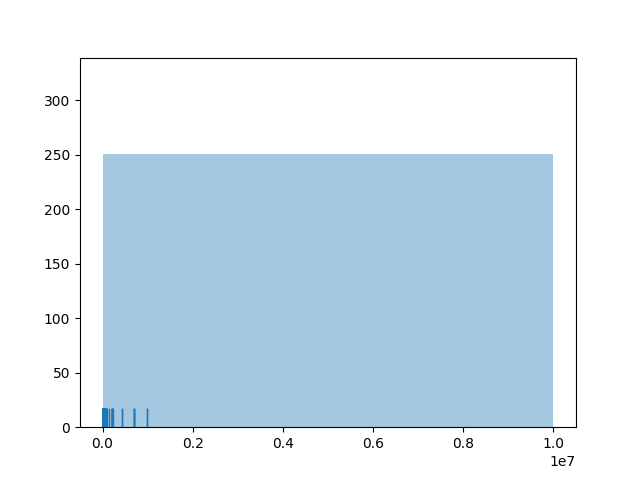

/home/mschen/code/nbooks/venv3/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


In [392]:
sns.distplot(repu['secure'], kde=False, rug=True, bins=[0,1000, 5000, 10000000])

# Descriptive statistics

## Data Summary

In [753]:
plotter.print_labeled_summary()

We labeled:
2657 clone groups
8690 clone elements
3562 answer posts
3184 question posts


<IPython.core.display.Javascript object>


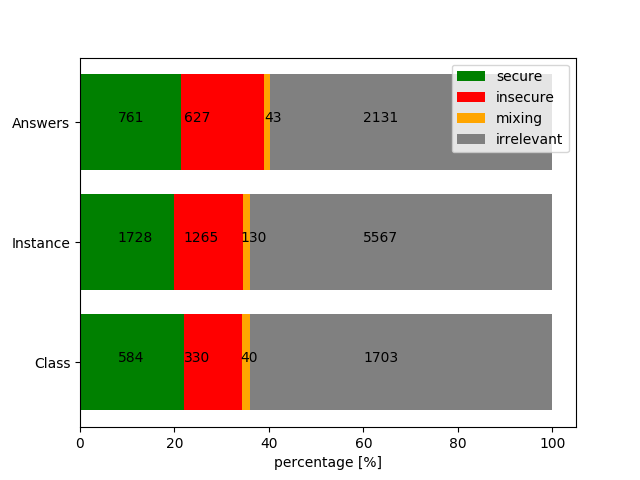

                 SE,  IN,  MI,  IR
clone classes:   [584, 330, 40, 1703]
clone instances: [1728, 1265, 130, 5567]
answers:         [761, 627, 43, 2131]


In [703]:
ax = plt.gca()
plotter.security_summary_barh(ax)
#plotter.labels_summary(slabels=range(0,8))

<IPython.core.display.Javascript object>


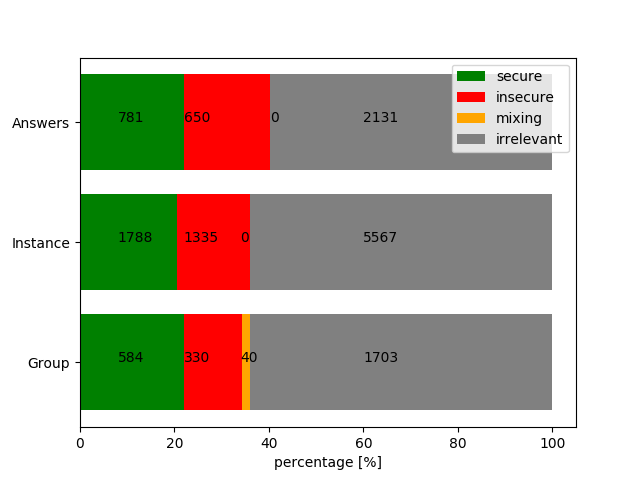

                 SE,  IN,  MI,  IR
clone classes:   [584, 330, 40, 1703]
clone instances: [1788, 1335, 0, 5567]
answers:         [781, 650, 0, 2131]


In [730]:
ax = plt.gca()
plotter.security_summary_barh(ax)
#plotter.labels_summary(slabels=range(0,8))

We labeled:
2657 clone groups
8690 clone elements
3562 answer posts
3184 question posts
Their distributions are as following:
security: 0=irrelavant, 1=I don't know, 2=secure, 3=somewhat secure, 4=insecure, ,5=mixing,  6=context, 7=no impact
category: 1=SSL, 2=symmetric, 3=asymmetric, 4=hash, 5=random


<IPython.core.display.Javascript object>


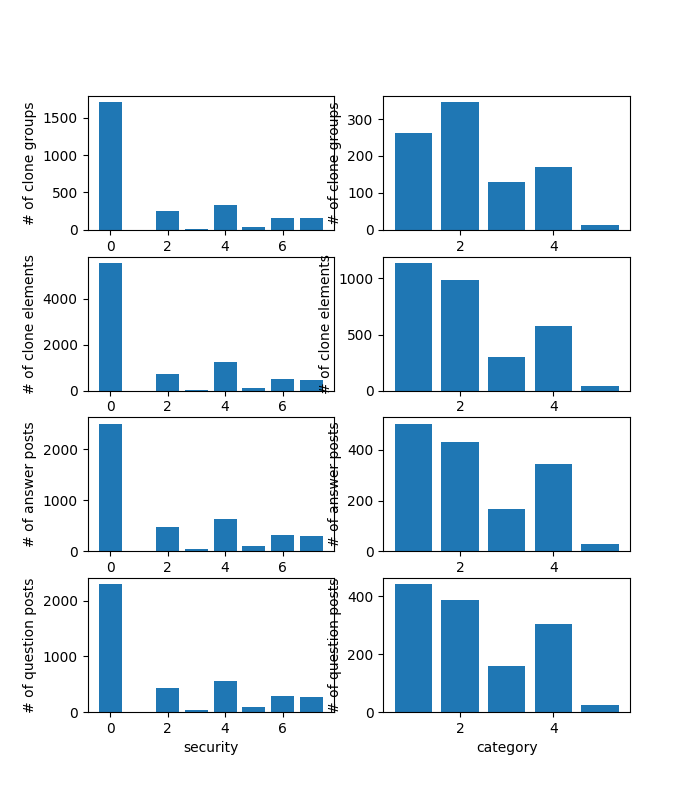

n_slabels: range(0, 8)
n_grps: [1703, 0, 250, 17, 330, 40, 163, 154]

n_scategorys: range(1, 6)
n_grps: [263, 345, 130, 171, 14]

n_slabels: range(0, 8)
n_elements: [5567, 0, 725, 48, 1265, 130, 502, 453]

n_scategorys: range(1, 6)
n_elements: [1137, 984, 303, 577, 37]

n_slabels: range(0, 8)
n_answers: [2498, 0, 474, 40, 627, 98, 311, 291]

n_scategorys: range(1, 6)
n_answers: [503, 432, 167, 346, 27]

n_slabels: range(0, 8)
n_questions: [2288, 0, 439, 37, 548, 94, 288, 271]

n_scategorys: range(1, 6)
n_questions: [440, 385, 157, 302, 24]


In [692]:
plotter.labels_summary(slabels=range(0,8))

In [41]:
tt = 
print(tt)
print(sum(tt))
print("total should be:", labeled.n_answer_posts('TRUE'))

[775, 610, 44, 2133]
3562
total should be: 3562


In [7]:
labeled.n_answer_posts('TRUE')

3562

In [28]:
labeled.n_cln_insts(labeled.is_mixed_clninst())

132

In [143]:
plotter.n_answer_posts(plotter.is_insecure_answer())

610

In [162]:
sum([2500, 0, 482, 40, 610, 99, 311, 296])

4338

In [18]:
plotter.n_answer_posts('labels.slabel=2 AND postid NOT IN (SELECT postid FROM labels WHERE slabel=4)')

417

In [38]:
print(plotter.is_secure_answer())

(labels.slabel=2 OR labels.slabel=6 OR labels.slabel=7) AND postid NOT IN (
                    SELECT postid FROM labels WHERE labels.slabel=4)


### View Count

<IPython.core.display.Javascript object>


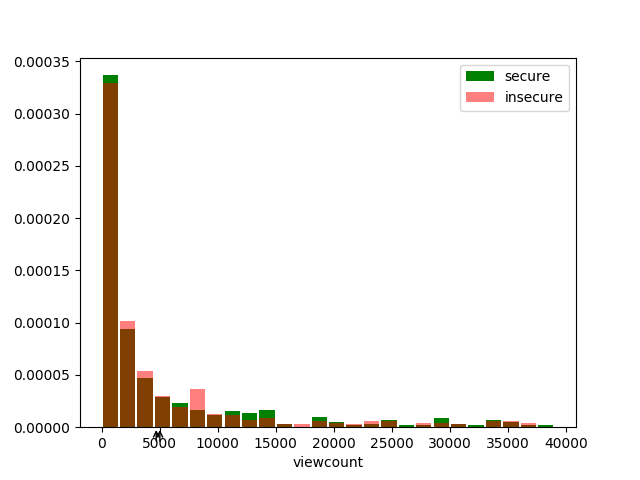

labels.slabel=2: n=396, aver=5024, min=22, max=38287, mid=1473
labels.slabel=4: n=472, aver=4710, min=26, max=37149, mid=1571


In [377]:
ax = plt.gca()
ax.cla()
plot_qattr_hist("viewcount", ax, ['labels.slabel=2', 'labels.slabel=4'], overlap=True, binstat=True,
                bins=range(0, 40000, 1500), stacked=False, density=True, rwidth=0.88,
                color=['green', to_rgba('red',0.5)], label=['secure', 'insecure'])

### Favorite Count

<IPython.core.display.Javascript object>


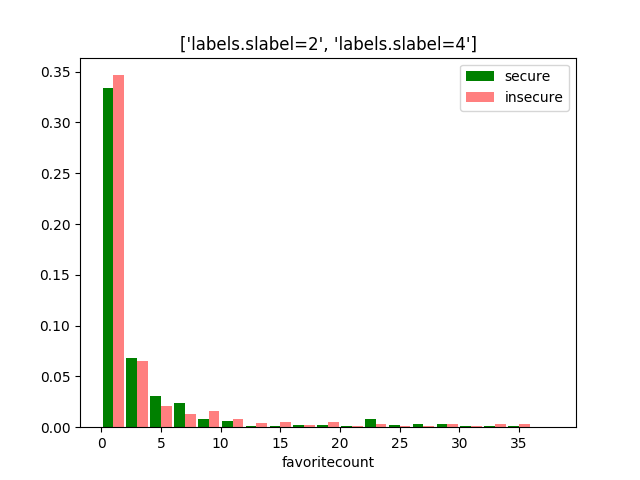

labels.slabel=2: n=421, aver=2, min=0, max=34, mid=1
labels.slabel=4: n=508, aver=2, min=0, max=35, mid=0


In [328]:
ax = plt.gca()
ax.cla()
plot_qattr_hist("favoritecount", ax, ['labels.slabel=2', 'labels.slabel=4'], overlap=False, binstat=True,
                 bins=range(0,40,2),stacked=False, density=True, label=['secure', 'insecure'], 
                color=['green', to_rgba('red',0.5)], rwidth=0.9, align='mid')

### Answer Count

<IPython.core.display.Javascript object>


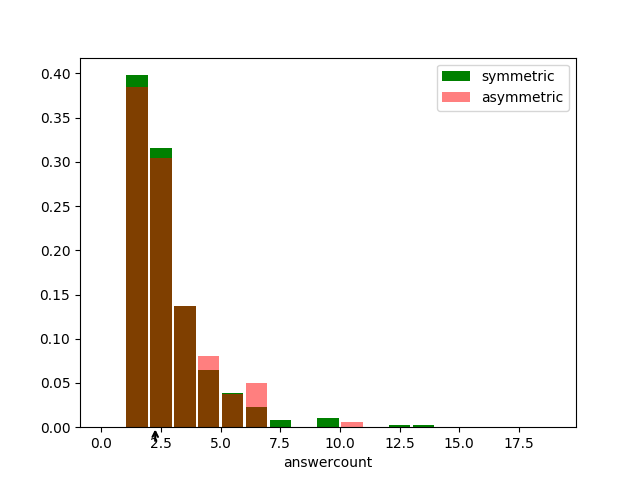

labels.scategory=2: n=387, aver=2, min=1, max=13, mid=2
labels.scategory=3: n=161, aver=2, min=1, max=10, mid=2


In [380]:
ax = plt.gca()
ax.cla()
plot_qattr_hist("answercount", ax, ['labels.scategory=2', 'labels.scategory=3'], overlap=True, binstat=True,
                 bins=range(0,20,1),stacked=False, density=True, label=['symmetric', 'asymmetric'], 
                color=['green', to_rgba('red',0.5)], rwidth=0.9, align='mid')

### Question Comment Count

<IPython.core.display.Javascript object>


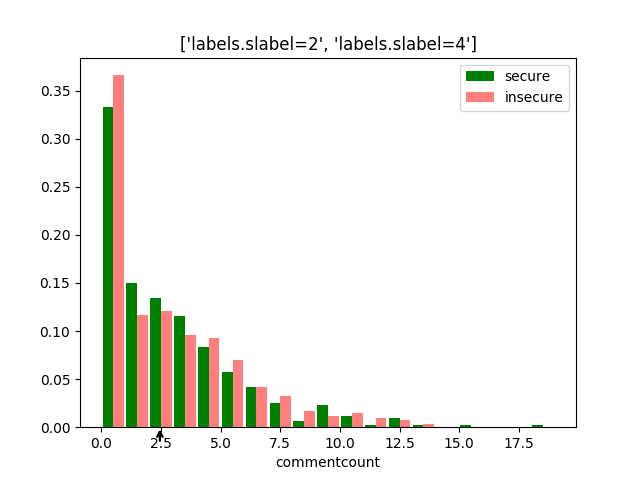

labels.slabel=2: n=433, aver=2, min=0, max=18, mid=2
labels.slabel=4: n=530, aver=2, min=0, max=13, mid=2


In [358]:
ax = plt.gca()
ax.cla()
plot_qattr_hist("commentcount", ax, ['labels.slabel=2', 'labels.slabel=4'], overlap=False, binstat=True,
                 bins=range(0,20,1),stacked=False, density=True, label=['secure', 'insecure'], 
                color=['green', to_rgba('red',0.5)], rwidth=0.9)

<IPython.core.display.Javascript object>


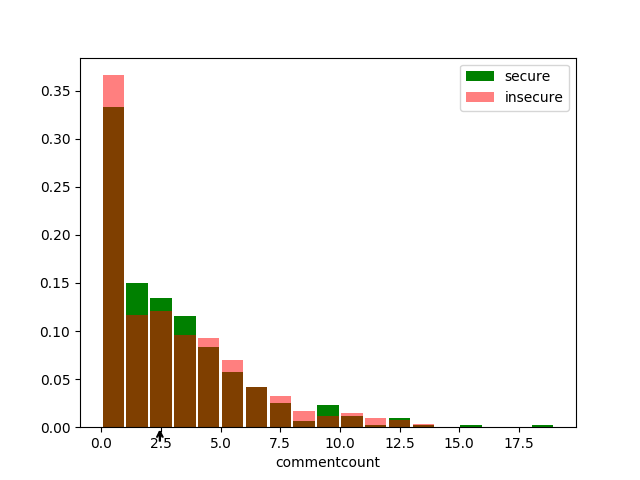

labels.slabel=2: n=433, aver=2, min=0, max=18, mid=2
labels.slabel=4: n=530, aver=2, min=0, max=13, mid=2


In [357]:
ax = plt.gca()
ax.cla()
plot_qattr_hist("commentcount", ax, ['labels.slabel=2', 'labels.slabel=4'], overlap=True, binstat=True,
                 bins=range(0,20,1),stacked=False, density=True, label=['secure', 'insecure'], 
                color=['green', to_rgba('red',0.5)], rwidth=0.9, align='mid')

### User Reputation

<IPython.core.display.Javascript object>


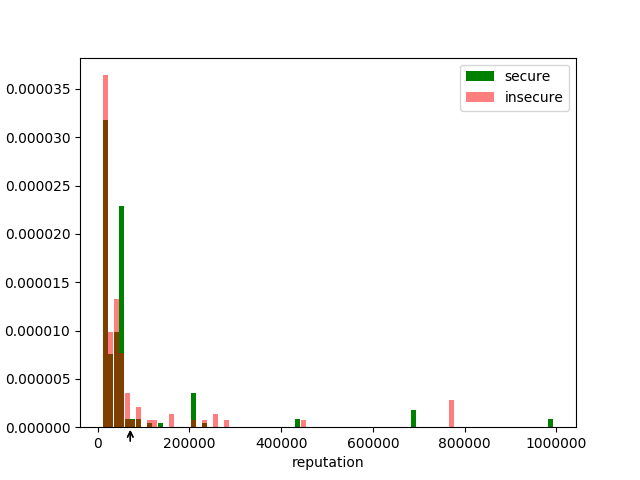

 ((labels.slabel=1 OR labels.slabel=2 OR labels.slabel=3 OR labels.slabel=6 OR labels.slabel=7) AND postid NOT IN (
                    SELECT postid FROM labels WHERE labels.slabel=4)) : n=186, aver=71232, min=10179, max=990402, mid=34661
 (labels.slabel=4) : n=119, aver=70887, min=10016, max=766766, mid=27326


In [298]:
ax = plt.gca()
ax.cla()
plot_uattr_hist("reputation", ax, [labeled.is_secure_answer(),labeled.is_insecure_answer()], overlap=True, binstat=True,
                 bins=range(10000, 100, 12000),stacked=False, density=True, label=['secure', 'insecure'], 
                color=['green', to_rgba('red',0.5)], rwidth=0.9, align='mid')

### User Views

<IPython.core.display.Javascript object>


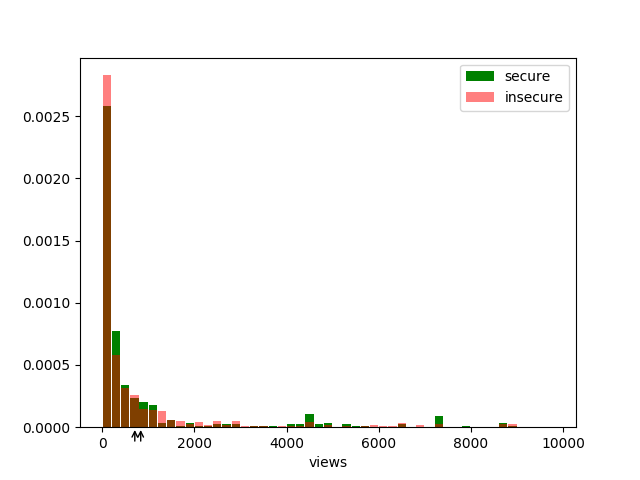

labels.slabel=2: n=428, aver=837, min=0, max=8834, mid=187
labels.slabel=4: n=585, aver=709, min=0, max=8834, mid=141


In [366]:
ax = plt.gca()
ax.cla()
plot_uattr_hist("views", ax, ['labels.slabel=2','labels.slabel=4'], overlap=True, binstat=True,
                 bins=range(0, 10000, 200),stacked=False, density=True, label=['secure', 'insecure'], 
                color=['green', to_rgba('red',0.5)], rwidth=0.9, align='mid')

## User age

<IPython.core.display.Javascript object>


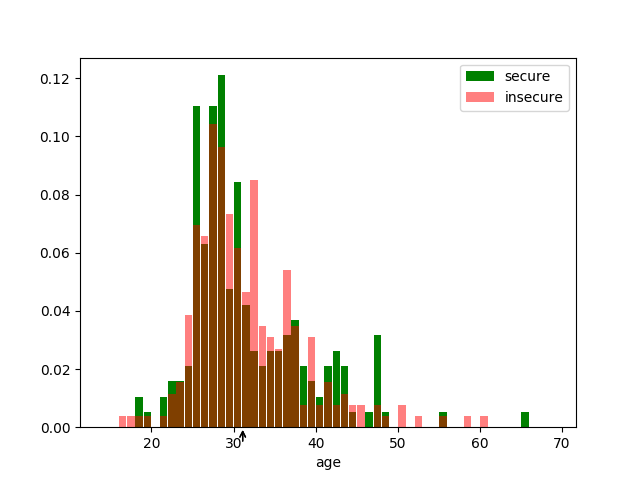

labels.slabel=2: n=190, aver=31, min=18, max=65, mid=29
labels.slabel=4: n=259, aver=31, min=16, max=60, mid=30


In [370]:
ax = plt.gca()
ax.cla()
plot_uattr_hist("age", ax, ['labels.slabel=2','labels.slabel=4'], overlap=True, binstat=True,
                 bins=range(14, 70, 1),stacked=False, density=True, label=['secure', 'insecure'], 
                color=['green', to_rgba('red',0.5)], rwidth=0.9, align='mid')

### User Upvotes

<IPython.core.display.Javascript object>


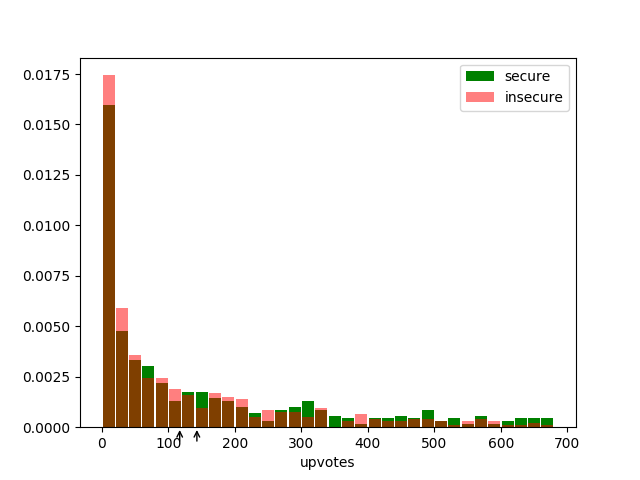

labels.slabel=2: n=345, aver=142, min=0, max=667, mid=64
labels.slabel=4: n=473, aver=117, min=0, max=679, mid=46


In [373]:
ax = plt.gca()
ax.cla()
plot_uattr_hist("upvotes", ax, ['labels.slabel=2','labels.slabel=4'], overlap=True, binstat=True,
                 bins=range(0, 700, 20),stacked=False, density=True, label=['secure', 'insecure'], 
                color=['green', to_rgba('red',0.5)], rwidth=0.9, align='mid')

### User Downvotes

<IPython.core.display.Javascript object>


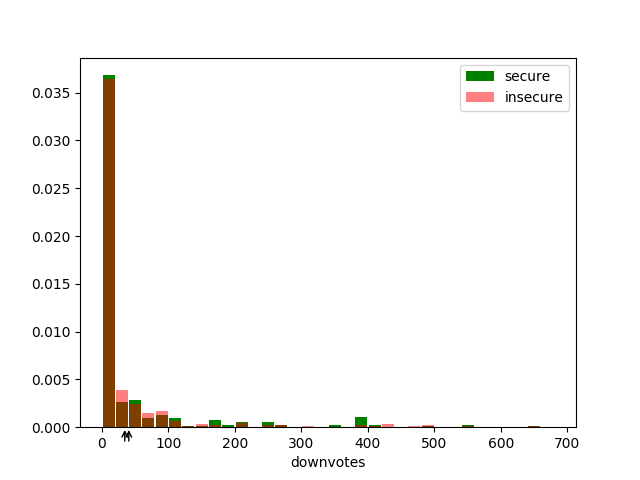

labels.slabel=2: n=406, aver=40, min=0, max=651, mid=5
labels.slabel=4: n=573, aver=34, min=0, max=643, mid=4


In [374]:
ax = plt.gca()
ax.cla()
plot_uattr_hist("downvotes", ax, ['labels.slabel=2','labels.slabel=4'], overlap=True, binstat=True,
                 bins=range(0, 700, 20),stacked=False, density=True, label=['secure', 'insecure'], 
                color=['green', to_rgba('red',0.5)], rwidth=0.9, align='mid')

## ratio: clone length / snippet length

<IPython.core.display.Javascript object>


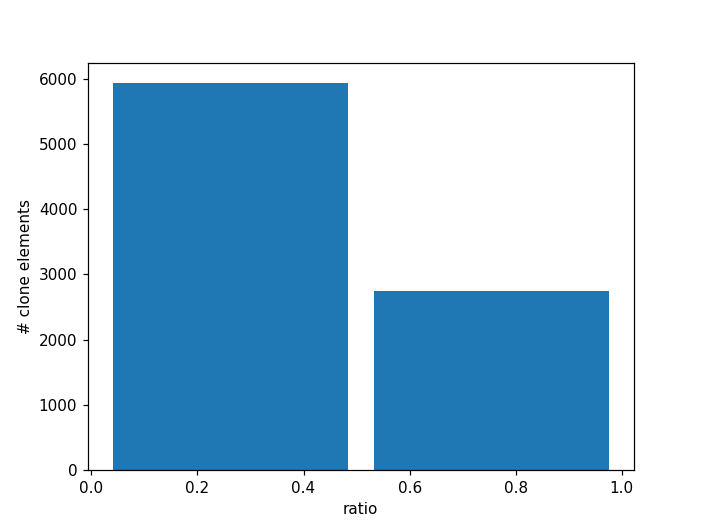

In [419]:
ax = plt.gca()
plot_length_ratio_hist(ax, bins=2, rwidth=0.9, density=False)

## 2. Clone detection workflow and results <a class="anchor" id="check"></a>

In the following function call, the script [implemented](#implementation) at the end of this file will run the entire clone detection workflow, including:

1. Export snippets from database to java files
2. Run CCFinder with specified options on those java files
3. Parse the CCFinder result file (.ccfxd) into database
4. Update the database with more information (eg. line number) from proprocessed files generated by CCFinder


As the first step, we run the entire clone detection process on the first 5,000 snipeets of the in total 25,855 extracted snippets.

In [ ]:
snippet_dname = 'all'
#snippet_id_range = (0,5000)
snippet_id_range = (0,50000000)
ccf_opt = ''
detect_clones(snippet_dname, ccf_opt, snippet_id_range, connect_str=connect_str)

We are then able to exam a lot of things by issuing query on the database. For example, in the following, we want to check each clones in a clone group. In this "5k" case, there are 356 clone groups. Below, we print out all elements in each clone group for some of the clone groups. A clone group is identified by clone id (cid).

Next, we will compute precision, recall, etc. by manually examing the following result. And then run the entire process on all the snippets.

By the way, scanning throught the following output, I did find the "overlap" case you mentioned (eg. for cid=1294)

In [ ]:
for cid in [917, 1489, 1294, 2867, 608, 576]:
    specific_group_check(cid=cid, tb_name_suffix='5k', connect_str=connect_str)

In [ ]:
tb_name_suffix = '5k'
with psycopg2.connect(connect_str) as conn:
        cursor = conn.cursor()
        sql_create = 'CREATE TABLE %s();'

# Implementation <a class="anchor" id="implementation"></a>

In [644]:
from IPython.display import Markdown, display
import psycopg2
import numpy as np
import pandas as pd
import matplotlib
%matplotlib notebook
import matplotlib.pyplot as plt
import os
import time
from statistics import *
from matplotlib.colors import to_rgba

In [3]:
connect_str = "dbname='stackoverflow' user='extractor' host='localhost' " + \
              "password='extractor'"

In [4]:
def codeprint(code):
    display(Markdown("""
```java
%s
```
""" % (code)))
    
def export_as_java(start_id, end_id, snippet_dpath):
    '''export from database to java files for id within range [start_id, end_id)'''
    with psycopg2.connect(connect_str) as conn:
        cursor = conn.cursor()
        cursor.execute("""SELECT postid, indx, code FROM snippets WHERE id >= %d AND id < %d;""" % (start_id, end_id))
        rows = cursor.fetchall()
        for row in rows:
            fname = '%d_%d.java' % (row[0], row[1])
            if not os.path.isdir(snippet_dpath):
                os.makedirs(snippet_dpath)
            fpath = os.path.join(snippet_dpath,fname)
            with open(fpath, 'w') as f:
                f.write(row[-1])
        print(len(rows), "snippets exported to", snippet_dpath)

### process .ccfxd file

In [5]:
def get_prepro_suffix(ccfxd_txt_fpath):
    with open(ccfxd_txt_fpath) as f:
        for line in f:
            if "option: -preprocessed_file_postfix" in line:
                return line.split()[-1]

def sql_4ccfxd_file_block(line, tb_name, fid_postid):
    '''prepare SQL for ccfxd file block'''
    file_info = line.split()
    fid = file_info[0]
    fname = "".join(file_info[1].split('/')[-1].split('.')[:-1])
    postid, indx = fname.split('_')
    fid_postid[fid] = (postid, indx) 
    length = file_info[2]
    sql = """INSERT INTO %s(fid, postid, indx, length)
VALUES(%s, %s, %s, %s) ON CONFLICT DO NOTHING;""" % (tb_name,
    fid, postid, indx, length)
    return sql

def sql_4ccfxd_pair_block(line, tb_name, fid_postid):
    '''prepare SQL for ccfxd clone pair block'''
    clone_pair = line.split()
    pid = ":".join(clone_pair[1:])  # unique pair id
    cid = clone_pair[0]
    clone0 = clone_pair[1].split(".")
    fid0 = clone0[0]
    tmp = clone0[1].split("-")
    tbegin0 = tmp[0]
    tend0 = tmp[1]
    clone1 = clone_pair[2].split(".")
    fid1 = clone1[0]
    tmp = clone1[1].split("-")
    tbegin1 = tmp[0]
    tend1 = tmp[1]
    sql = """INSERT INTO %s(pid, cid,
postid0, indx0, tbegin0, tend0,
postid1, indx1, tbegin1, tend1
) VALUES ($aesc6$%s$aesc6$, %s,
%s, %s, %s, %s,
%s, %s, %s, %s) ON CONFLICT DO NOTHING;""" % (tb_name, pid, cid,
    fid_postid[fid0][0], fid_postid[fid0][1], tbegin0, tend0,
    fid_postid[fid1][0], fid_postid[fid1][1], tbegin1, tend1)
    return sql

def ccfxd2db(ccfxd_txt_fpath, connect_str):
    '''dump .ccfxd file to postgresql database'''
    with psycopg2.connect(connect_str) as conn:
        cursor = conn.cursor()
        tb_name_suffix = "".join(os.path.basename(ccfxd_txt_fpath).split(".")[:-1])
        file_tb_name = "source_files_%s" % (tb_name_suffix)
        pair_tb_name = "clone_pairs_%s" % (tb_name_suffix)
        sql_create = """CREATE TABLE IF NOT EXISTS %s(
fid INT,
postid INT,
indx INT,
length INT,
PRIMARY KEY (fid),
FOREIGN KEY (postid, indx) REFERENCES snippets(postid, indx)
);
""" % (file_tb_name)
        cursor.execute(sql_create)
        
        sql_create = """CREATE TABLE IF NOT EXISTS %s(
pid VARCHAR(64), 
cid INT,
postid0 INT,
indx0 INT,
tbegin0 INT,
tend0 INT,
lbegin0 INT,
lend0 INT,
code0 VARCHAR(24060),
postid1 INT,
indx1 INT,
tbegin1 INT,
tend1 INT,
lbegin1 INT,
lend1 INT,
code1 VARCHAR(24060),
PRIMARY KEY (pid)
); 
""" % (pair_tb_name)
        cursor.execute(sql_create)
                
        fid_postid = {}
        with open(ccfxd_txt_fpath) as f:
            parsing_fid = False
            parsing_cid = False
            for line in f:
                if line == 'source_files {\n':
                    parsing_fid = True
                    continue
                if parsing_fid:
                    if line == '}\n':
                        parsing_fid = False
                        continue
                    sql = sql_4ccfxd_file_block(line, file_tb_name, fid_postid)
                    cursor.execute(sql)

                if line == 'clone_pairs {\n':
                    parsing_cid = True
                    continue
                if parsing_cid:
                    if line == '}\n':
                        parsing_cid = False
                        continue
                    sql = sql_4ccfxd_pair_block(line, pair_tb_name, fid_postid)
                    cursor.execute(sql)
    print("Done:", ccfxd_txt_fpath,"written to", file_tb_name, "and", pair_tb_name)


########## process intermediate file

def itoken2iline(itokens, prepro_fpath):
    '''convert token index to line index, both are 0 based'''
    ilines = []
    with open(prepro_fpath) as f:
        for i, line in enumerate(f):
            if i in itokens:
                iline = int(line.split('.')[0],16)-1
                ilines.append(iline)
    return itokens.__class__(ilines)



def update_clone_pair_db(snippet_dpath, connect_str,
                         prepro_suffix='.java.2_0_0_0.default.ccfxprep',
                         prepro_dname = '.ccfxprepdir/'):
    with psycopg2.connect(connect_str) as conn:
        tb_name_suffix = os.path.basename(snippet_dpath)
        file_tb_name = "source_files_%s" % (tb_name_suffix)
        pair_tb_name = "clone_pairs_%s" % (tb_name_suffix)
        cursor = conn.cursor()
    #   1       2        3         4           5
        sql = """SELECT p.pid,
p.postid0, p.indx0, s0.code, p.tbegin0, p.tend0,
p.postid1, p.indx1, s1.code, p.tbegin1, p.tend1
FROM %s p
INNER JOIN snippets s0
  ON p.postid0 = s0.postid AND p.indx0 = s0.indx
INNER JOIN snippets s1
  ON p.postid1 = s1.postid AND p.indx1 = s1.indx
;""" % (pair_tb_name)
        cursor.execute(sql)
        rows = cursor.fetchall()
        for row in rows:
            snippet0_fname = "%d_%d.java" % (row[1], row[2])
            snippet1_fname = "%d_%d.java" % (row[6], row[7])
            snippet0_url = "http://stackoverflow.com/questions/%d" % (row[1])
            snippet1_url = "http://stackoverflow.com/questions/%d" % (row[6])
            snippet0_fpath = os.path.join(snippet_dpath, snippet0_fname)
            snippet1_fpath = os.path.join(snippet_dpath, snippet1_fname)
            prepro0_fpath = os.path.join(snippet_dpath, prepro_dname, snippet0_fname+prepro_suffix)
            prepro1_fpath = os.path.join(snippet_dpath, prepro_dname, snippet1_fname+prepro_suffix)
            snippet0_trange = row[4:6]
            snippet1_trange = row[9:11]
            if not (os.path.exists(prepro0_fpath) and os.path.exists(prepro1_fpath)):
                continue
            snippet0_lrange = itoken2iline(snippet0_trange, prepro0_fpath)
            snippet1_lrange = itoken2iline(snippet1_trange, prepro1_fpath)
            code0 = row[3].split('\n')
            code1 = row[8].split('\n')
            update_sql = """INSERT INTO %s
(pid, lbegin0, lend0, code0, lbegin1, lend1, code1)
VALUES
($aesc6$%s$aesc6$, %d, %d, $aesc6$%s$aesc6$, %d, %d, $aesc6$%s$aesc6$) ON CONFLICT(pid) DO UPDATE
SET
(lbegin0, lend0, code0, lbegin1, lend1, code1) = 
(%d, %d, $aesc6$%s$aesc6$, %d, %d, $aesc6$%s$aesc6$);
""" % (pair_tb_name, row[0],
       snippet0_lrange[0], snippet0_lrange[1], "\n".join(code0[snippet0_lrange[0]:snippet0_lrange[1]]),
       snippet1_lrange[0], snippet1_lrange[1], "\n".join(code1[snippet1_lrange[0]:snippet1_lrange[1]]),
       snippet0_lrange[0], snippet0_lrange[1], "\n".join(code0[snippet0_lrange[0]:snippet0_lrange[1]]),
       snippet1_lrange[0], snippet1_lrange[1], "\n".join(code1[snippet1_lrange[0]:snippet1_lrange[1]]))
            #print(update_sql)
            cursor.execute(update_sql)
            #print("========================")
            #print(snippet0_url)
            #codeprint("\n".join(code0[snippet0_lrange[0]:snippet0_lrange[1]]))
            #print("-----------")
            #print(snippet1_url)
            #codeprint("\n".join(code0[snippet1_lrange[0]:snippet1_lrange[1]]))


def call_ccfinder(opt, snippet_dpath, ccfxd_fpath, ccfxd_txt_fpath):
    cmds = [
        "cd ~/code/ccfinderx-core/ccfx",
        "ccfx d java %s -dn %s -o %s" % (opt, snippet_dpath, ccfxd_fpath),
        "ccfx p %s > %s" % (ccfxd_fpath, ccfxd_txt_fpath)
    ] 
    cmd = " && ".join(cmds)
    print(cmd)
    print("...", end='')
    os.system(cmd)
    print("Done")

            
def detect_clones(snippet_dname, ccf_opt, snippet_id_range, connect_str):
    '''snippet_dname must be unique'''
    script_workdir = os.getcwd()
    snippet_dpath = os.path.join(script_workdir, snippet_dname)
    ccfxd_fpath = os.path.join(script_workdir, os.path.basename(snippet_dpath) + ".ccfxd")
    ccfxd_txt_fpath = os.path.join(script_workdir, os.path.basename(snippet_dpath) + ".txt")
    export_as_java(snippet_id_range[0], snippet_id_range[1], snippet_dpath=snippet_dpath)
    call_ccfinder(opt=ccf_opt, snippet_dpath=snippet_dpath, ccfxd_fpath=ccfxd_fpath, 
                  ccfxd_txt_fpath=ccfxd_txt_fpath)
    ccfxd2db(ccfxd_txt_fpath, connect_str=connect_str)
    update_clone_pair_db(snippet_dpath=snippet_dpath, connect_str=connect_str)


### visualization

In [6]:
def rand_pair_check(n_rows, tb_name_suffix, connect_str, export=False):
    with psycopg2.connect(connect_str) as conn:
        file_tb_name = "source_files_%s" % (tb_name_suffix)
        pair_tb_name = "clone_pairs_%s" % (tb_name_suffix)
        cursor = conn.cursor()
        sql = """SELECT f0.postid, p.code0, f1.postid, p.code1
FROM %s p
INNER JOIN %s f0
  ON p.fid0 = f0.fid
INNER JOIN snippets s0
  ON f0.postid = s0.postid
INNER JOIN snippets ss0
  ON f0.indx = ss0.indx
INNER JOIN %s f1
  ON p.fid1 = f1.fid
INNER JOIN snippets s1
  ON f1.postid = s1.postid
INNER JOIN snippets ss1
  ON f1.indx = ss1.indx
WHERE p.fid0 = f0.fid
  AND p.fid1 = f1.fid
  AND f0.postid = s0.postid
  AND f0.indx = ss0.indx
  AND s0.postid = ss0.postid
  AND s0.indx = ss0.indx
  AND f1.postid = s1.postid
  AND f1.indx = ss1.indx
  AND s1.postid = ss1.postid
  AND s1.indx = ss1.indx
  AND (p.fid0 < p.fid1
       OR (p.fid0 = p.fid1 AND p.tbegin0 < p.tbegin1))
ORDER BY random()
LIMIT %d
;""" % (pair_tb_name, file_tb_name, file_tb_name, n_rows)
        cursor.execute(sql)
        rows = cursor.fetchall()
        url_prefix = "http://stackoverflow.com/questions/"
        for row in rows:
            print("=================")
            code0_url = url_prefix+str(row[0])
            print(code0_url)
            codeprint(row[1])
            print("-------")
            code1_url = url_prefix+str(row[2])
            print(code1_url)
            codeprint(row[3])



def specific_group_check(cid, tb_name_suffix, connect_str, dry=False):
    with psycopg2.connect(connect_str) as conn:
        file_tb_name = "source_files_%s" % (tb_name_suffix)
        pair_tb_name = "clone_pairs_%s" % (tb_name_suffix)
        cursor = conn.cursor()
        sql = """SELECT DISTINCT s.postid, p.code0, p.lbegin0, p.lend0, ppo.title, ppo.tags
FROM %s p
INNER JOIN %s f
  ON p.fid0 = f.fid
INNER JOIN snippets s
  ON f.postid = s.postid
INNER JOIN snippets ss
  ON f.indx = ss.indx
INNER JOIN posts po
  ON f.postid = po.id
INNER JOIN posts ppo
  ON po.parentid = ppo.id
WHERE p.fid0 = f.fid
  AND f.postid = s.postid
  AND f.indx = ss.indx
  AND s.postid = ss.postid
  AND s.indx = ss.indx
  AND f.postid = po.id
  AND cid=%d
;""" % (pair_tb_name, file_tb_name, cid)
        if dry:
            print(sql)
            return
        cursor.execute(sql)
        rows = cursor.fetchall()
        url_prefix = "http://stackoverflow.com/questions/"
        n_rows = len(rows)
        print("========Clone group cid: %d, containing %d clone elements=========" % (cid, n_rows))
        for i in range(n_rows):
            print("----%d/%d----" % (i, n_rows))
            row = rows[i]
            print(row[4])
            print(row[5])
            code0_url = url_prefix+str(row[0])+"    Ln %d-%d" % (row[2], row[3])
            print(code0_url)
            codeprint(row[1])
            
def drop_tables(tb_name_suffix, connect_str):
    with psycopg2.connect(connect_str) as conn:
        cursor = conn.cursor()
        sql = """DROP TABLE IF EXISTS clone_pairs_%s, source_files_%s;""" % (tb_name_suffix, tb_name_suffix)
        cursor.execute(sql)

def create_labels_table(connect_str):
    with psycopg2.connect(connect_str) as conn:
        cursor = conn.cursor()    
        sql_create = """CREATE TABLE labels(
postid INT, indx INT, tbegin INT, tend INT, slabel INT, scategory INT, reason VARCHAR(128), comment VARCHAR(128),
PRIMARY KEY (postid, indx, tbegin, tend));        
"""
        cursor.execute(sql_create)

# label ui

In [722]:
filterstr = """labels.slabel=5"""
cids = clones.get_cids(filterstr)
clones.label_ui_for_mixed(cids, view_only=False)

start labeling 40 clone groups

====0/40====Clone group cid: 840, containing 2 clone elements=========
----1/2----
http://stackoverflow.com/questions/28213834




```java
public class sample{
 public void foo(){
var md5 = CryptoJS.algo.MD5.create();

md5.update("file part 1");
md5.update("file part 2");
md5.update("file part 3");

var hash = md5.finalize();

}
```


----2/2----
http://stackoverflow.com/questions/30424589




```java
public class sample{
 public void foo(){
var sha256 = CryptoJS.algo.SHA256.create();
sha256.update("Message Part 1");
sha256.update("Message Part 2");
sha256.update("Message Part 3");
var hash = sha256.finalize();

}
```


vvvvvvvvvvvvv--INPUT--vvvvvvvvvvvvvv
instances to be labeled:1
slabel; scategory; reason; comment:4;4;md5
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
instances to be labeled:2
slabel; scategory; reason; comment:4;2;sha1
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

====1/40====Clone group cid: 1069, containing 2 clone elements=========
----1/2----
http://stackoverflow.com/questions/5665680




```java
public class sample{
 public void foo(){
Cipher cipher = Cipher.getInstance("AES/ECB/PKCS5Padding", "SunJCE");
Key skeySpec = KeyGenerator.getInstance("AES").generateKey();
cipher.init(Cipher.ENCRYPT_MODE, skeySpec);
System.out.println(Arrays.toString(cipher.doFinal(new byte[] { 0, 1, 2, 3 })));

}
```


----2/2----
http://stackoverflow.com/questions/6252501




```java
public class sample{
 public void foo(){
final Cipher cipher = Cipher.getInstance("AES/CFB/NoPadding", "SunJCE");
final SecretKey skeySpec = KeyGenerator.getInstance("AES")
        .generateKey();
cipher.init(Cipher.ENCRYPT_MODE, skeySpec);
System.out.println(Arrays.toString(cipher.doFinal(new byte[] { 0, 1, 2,
            3 })));

}
```


vvvvvvvvvvvvv--INPUT--vvvvvvvvvvvvvv
instances to be labeled:1
slabel; scategory; reason; comment:4;2;AES/ECB
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
instances to be labeled:2
slabel; scategory; reason; comment:2;2
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

====2/40====Clone group cid: 1081, containing 2 clone elements=========
----1/2----
http://stackoverflow.com/questions/43147199




```java
public class sample{
/**
 * Find a factor of n by following the algorithm outlined in Handbook of Applied Cryptography, section
 * 8.2.2(i). See http://cacr.uwaterloo.ca/hac/about/chap8.pdf.
 *
 */

private static BigInteger findFactor(BigInteger e, BigInteger d, BigInteger n) {
    BigInteger edMinus1 = e.multiply(d).subtract(BigInteger.ONE);
    int s = edMinus1.getLowestSetBit();
    BigInteger t = edMinus1.shiftRight(s);

    for (int aInt = 2; true; aInt++) {
        BigInteger aPow = BigInteger.valueOf(aInt).modPow(t, n);
        for (int i = 1; i <= s; i++) {
            if (aPow.equals(BigInteger.ONE)) {
                break;
            }
            if (aPow.equals(n.subtract(BigInteger.ONE))) {
                break;
            }
            BigInteger aPowSquared = aPow.multiply(aPow).mod(n);
            if (aPowSquared.equals(BigInteger.ONE)) {
                return aPow.subtract(BigInteger.ONE).gcd(n);
            }
            aPow = aPowSquared;
        }
    }

}

public static RSAPrivateCrtKey createCrtKey(RSAPublicKey rsaPub, RSAPrivateKey rsaPriv) throws NoSuchAlgorithmException, InvalidKeySpecException {

    BigInteger e = rsaPub.getPublicExponent();
    BigInteger d = rsaPriv.getPrivateExponent();
    BigInteger n = rsaPub.getModulus();
    BigInteger p = findFactor(e, d, n);
    BigInteger q = n.divide(p);
    if (p.compareTo(q) > 1) {
        BigInteger t = p;
        p = q;
        q = t;
    }
    BigInteger exp1 = d.mod(p.subtract(BigInteger.ONE));
    BigInteger exp2 = d.mod(q.subtract(BigInteger.ONE));
    BigInteger coeff = q.modInverse(p);
    RSAPrivateCrtKeySpec keySpec = new RSAPrivateCrtKeySpec(n, e, d, p, q, exp1, exp2, coeff);
    KeyFactory kf = KeyFactory.getInstance("RSA");
    return (RSAPrivateCrtKey) kf.generatePrivate(keySpec);

}

```


----2/2----
http://stackoverflow.com/questions/46841131




```java
public class sample{
/**
 * Find a factor of n by following the algorithm outlined in Handbook of Applied Cryptography, section
 * 8.2.2(i). See http://cacr.uwaterloo.ca/hac/about/chap8.pdf.
 *
 */

private static BigInteger findFactor(BigInteger e, BigInteger d, BigInteger n) {
    BigInteger edMinus1 = e.multiply(d).subtract(BigInteger.ONE);
    int s = edMinus1.getLowestSetBit();
    BigInteger t = edMinus1.shiftRight(s);

    for (int aInt = 2; true; aInt++) {
        BigInteger aPow = BigInteger.valueOf(aInt).modPow(t, n);
        for (int i = 1; i <= s; i++) {
            if (aPow.equals(BigInteger.ONE)) {
                break;
            }
            if (aPow.equals(n.subtract(BigInteger.ONE))) {
                break;
            }
            BigInteger aPowSquared = aPow.multiply(aPow).mod(n);
            if (aPowSquared.equals(BigInteger.ONE)) {
                return aPow.subtract(BigInteger.ONE).gcd(n);
            }
            aPow = aPowSquared;
        }
    }

}

public static RSAPrivateCrtKey createCrtKey(RSAPublicKey rsaPub, RSAPrivateKey rsaPriv) throws NoSuchAlgorithmException, InvalidKeySpecException {

    BigInteger e = rsaPub.getPublicExponent();
    BigInteger d = rsaPriv.getPrivateExponent();
    BigInteger n = rsaPub.getModulus();
    BigInteger p = findFactor(e, d, n);
    BigInteger q = n.divide(p);
    if (p.compareTo(q) > 1) {
        BigInteger t = p;
        p = q;
        q = t;
    }
    BigInteger exp1 = d.mod(p.subtract(BigInteger.ONE));
    BigInteger exp2 = d.mod(q.subtract(BigInteger.ONE));
    BigInteger coeff = q.modInverse(p);
    RSAPrivateCrtKeySpec keySpec = new RSAPrivateCrtKeySpec(n, e, d, p, q, exp1, exp2, coeff);
    KeyFactory kf = KeyFactory.getInstance("RSA");
    return (RSAPrivateCrtKey) kf.generatePrivate(keySpec);

}

```


vvvvvvvvvvvvv--INPUT--vvvvvvvvvvvvvv
instances to be labeled:1,2
slabel; scategory; reason; comment:2;3
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

====3/40====Clone group cid: 1604, containing 3 clone elements=========
----1/3----
http://stackoverflow.com/questions/26614822




```java
    DESKeySpec desKeySpec = new DESKeySpec(ivBytes);
    SecretKeyFactory keyFactory = SecretKeyFactory.getInstance("DES");
    SecretKey sKey = keyFactory.generateSecret(desKeySpec);
    Cipher ecipher = Cipher.getInstance("DES");
    ecipher.init(Cipher.ENCRYPT_MODE, sKey);
```


----2/3----
http://stackoverflow.com/questions/15427868




```java
    X509EncodedKeySpec publicKeySpec = new X509EncodedKeySpec(encodedKey);
    KeyFactory kf = KeyFactory.getInstance("RSA");
    PublicKey pkPublic = kf.generatePublic(publicKeySpec);

    Cipher pkCipher = Cipher.getInstance("RSA/ECB/PKCS1PADDING");
    pkCipher.init(Cipher.DECRYPT_MODE, pkPublic);

```


----3/3----
http://stackoverflow.com/questions/10958133




```java
X509EncodedKeySpec spec = new X509EncodedKeySpec(pk);
KeyFactory keyFactory = KeyFactory.getInstance("RSA");
PublicKey pubKey = keyFactory.generatePublic(spec);
Cipher cipher = Cipher.getInstance("RSA/ECB/PKCS1Padding");
cipher.init(Cipher.ENCRYPT_MODE, pubKey);
```


vvvvvvvvvvvvv--INPUT--vvvvvvvvvvvvvv
instances to be labeled:1
slabel; scategory; reason; comment:4;2;DES
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
instances to be labeled:2,3
slabel; scategory; reason; comment:4;3;PKCS1 padding
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

====4/40====Clone group cid: 1607, containing 2 clone elements=========
----1/2----
http://stackoverflow.com/questions/26614822




```java
    byte[] ivBytes = "1234567812345678".getBytes();
    DESKeySpec desKeySpec = new DESKeySpec(ivBytes);
    SecretKeyFactory keyFactory = SecretKeyFactory.getInstance("DES");
    SecretKey sKey = keyFactory.generateSecret(desKeySpec);
    Cipher ecipher = Cipher.getInstance("DES");
    ecipher.init(Cipher.ENCRYPT_MODE, sKey);
    byte[] outputBytes = ecipher.doFinal(inputBytes);

    // Send the file's size, 4 bytes.
    // Use an 8 byte buffer to send big files > 2GB.
```


----2/2----
http://stackoverflow.com/questions/10958133




```java
byte[] pk = keyPair.getPublic().getEncoded();
X509EncodedKeySpec spec = new X509EncodedKeySpec(pk);
KeyFactory keyFactory = KeyFactory.getInstance("RSA");
PublicKey pubKey = keyFactory.generatePublic(spec);
Cipher cipher = Cipher.getInstance("RSA/ECB/PKCS1Padding");
cipher.init(Cipher.ENCRYPT_MODE, pubKey);
byte[] encrypted = cipher.doFinal(data);

```


vvvvvvvvvvvvv--INPUT--vvvvvvvvvvvvvv
instances to be labeled:1
slabel; scategory; reason; comment:4;2;static iv, DES
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
instances to be labeled:2
slabel; scategory; reason; comment:4;3;PKCS1 padding
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

====5/40====Clone group cid: 2478, containing 4 clone elements=========
----1/4----
http://stackoverflow.com/questions/29875540




```java
public class HttpsClient extends DefaultHttpClient {

    final Context context;

    public HttpsClient(Context context) {
        this.context = context;
    }

    @Override
    protected ClientConnectionManager createClientConnectionManager() {
        SchemeRegistry registry = new SchemeRegistry();
        registry.register(new Scheme("http", PlainSocketFactory
                .getSocketFactory(), 80));
        // Register for port 443 our SSLSocketFactory with our keystore
        // to the ConnectionManager
        registry.register(new Scheme("https", newSslSocketFactory(), 443));
        return new SingleClientConnManager(getParams(), registry);
    }

    private SSLSocketFactory newSslSocketFactory() {
        try {
            // Get an instance of the Bouncy Castle KeyStore format
            KeyStore trusted = KeyStore.getInstance("BKS");
            // Get the raw resource, which contains the keystore with
            // your trusted certificates (root and any intermediate certs)
            InputStream in = context.getResources().openRawResource(
                    R.raw.mykeystore);
            try {
                // Initialize the keystore with the provided trusted
                // certificates
                // Also provide the password of the keystore
                trusted.load(in, "mysecret".toCharArray());
            } finally {
                in.close();
            }
            // Pass the keystore to the SSLSocketFactory. The factory is
            // responsible
            // for the verification of the server certificate.
            SSLSocketFactory sf = new SSLSocketFactory(trusted);
            // Hostname verification from certificate
            sf.setHostnameVerifier(SSLSocketFactory.ALLOW_ALL_HOSTNAME_VERIFIER);
            return sf;
        } catch (Exception e) {
            throw new AssertionError(e);
        }
    }
}
```


----2/4----
http://stackoverflow.com/questions/10026598




```java
public class MyHttpClient extends DefaultHttpClient {

    final Context context;

    public MyHttpClient(Context context) {
        this.context = context;
    }

    @Override
    protected ClientConnectionManager createClientConnectionManager() {
        SchemeRegistry registry = new SchemeRegistry();

        registry.register(new Scheme("http", PlainSocketFactory.getSocketFactory(), 80));

        // Register for port 443 our SSLSocketFactory with our keystore to the ConnectionManager
        registry.register(new Scheme("https", newSslSocketFactory(), 443));
        return new SingleClientConnManager(getParams(), registry);
    }

    private SSLSocketFactory newSslSocketFactory() {
        try {
            // Get an instance of the Bouncy Castle KeyStore format
            KeyStore trusted = KeyStore.getInstance("BKS");

            // Get the raw resource, which contains the keystore with your trusted certificates (root and any intermediate certs)
            InputStream in = context.getResources().openRawResource(R.raw.aglite);
            try {
                // Initialize the keystore with the provided trusted certificates.
                // Also provide the password of the keystore
                trusted.load(in, "aglite".toCharArray());
            } finally {
                in.close();
            }

            // Pass the keystore to the SSLSocketFactory. The factory is responsible for the verification of the server certificate.
            SSLSocketFactory sf = new SSLSocketFactory(trusted);

            // Hostname verification from certificate
            // http://hc.apache.org/httpcomponents-client-ga/tutorial/html/connmgmt.html#d4e506
            sf.setHostnameVerifier(SSLSocketFactory.ALLOW_ALL_HOSTNAME_VERIFIER);
            return sf;
        } catch (Exception e) {
            throw new AssertionError(e);
        }
    }
}
```


----3/4----
http://stackoverflow.com/questions/10026814




```java
public class MyHttpClient extends DefaultHttpClient {

    final Context context;

    public MyHttpClient(Context context) {
        this.context = context;
    }

    @Override
    protected ClientConnectionManager createClientConnectionManager() {
        SchemeRegistry registry = new SchemeRegistry();

        registry.register(new Scheme("http", PlainSocketFactory.getSocketFactory(), 80));

        // Register for port 443 our SSLSocketFactory with our keystore to the ConnectionManager
        registry.register(new Scheme("https", newSslSocketFactory(), 443));
        return new SingleClientConnManager(getParams(), registry);
    }

    private SSLSocketFactory newSslSocketFactory() {
        try {
            // Get an instance of the Bouncy Castle KeyStore format
            KeyStore trusted = KeyStore.getInstance("BKS");

            // Get the raw resource, which contains the keystore with your trusted certificates (root and any intermediate certs)
            InputStream in = context.getResources().openRawResource(R.raw.aglite);
            try {
                // Initialize the keystore with the provided trusted certificates.
                // Also provide the password of the keystore
                trusted.load(in, "aglite".toCharArray());
            } finally {
                in.close();
            }

            // Pass the keystore to the SSLSocketFactory. The factory is responsible for the verification of the server certificate.
            SSLSocketFactory sf = new SSLSocketFactory(trusted);

            // Hostname verification from certificate
            // http://hc.apache.org/httpcomponents-client-ga/tutorial/html/connmgmt.html#d4e506
            sf.setHostnameVerifier(SSLSocketFactory.ALLOW_ALL_HOSTNAME_VERIFIER);
            return sf;
        } catch (Exception e) {
            throw new AssertionError(e);
        }
    }
}
```


----4/4----
http://stackoverflow.com/questions/3998257




```java
public class MyHttpClient extends DefaultHttpClient {

  final Context context;

  public MyHttpClient(Context context) {
      this.context = context;
  }

  @Override
  protected ClientConnectionManager createClientConnectionManager() {
      SchemeRegistry registry = new SchemeRegistry();
      registry.register(new Scheme("http", PlainSocketFactory.getSocketFactory(), 80));
      // Register for port 443 our SSLSocketFactory with our keystore
      // to the ConnectionManager
      registry.register(new Scheme("https", newSslSocketFactory(), 443));
      return new SingleClientConnManager(getParams(), registry);
  }

  private SSLSocketFactory newSslSocketFactory() {
      try {
          // Get an instance of the Bouncy Castle KeyStore format
          KeyStore trusted = KeyStore.getInstance("BKS");
          // Get the raw resource, which contains the keystore with
          // your trusted certificates (root and any intermediate certs)
          InputStream in = context.getResources().openRawResource(R.raw.mykeystore);
          try {
              // Initialize the keystore with the provided trusted certificates
              // Also provide the password of the keystore
              trusted.load(in, "mysecret".toCharArray());
          } finally {
              in.close();
          }
          // Pass the keystore to the SSLSocketFactory. The factory is responsible
          // for the verification of the server certificate.
          SSLSocketFactory sf = new SSLSocketFactory(trusted);
          // Hostname verification from certificate
          // http://hc.apache.org/httpcomponents-client-ga/tutorial/html/connmgmt.html#d4e506
          sf.setHostnameVerifier(SSLSocketFactory.STRICT_HOSTNAME_VERIFIER);
          return sf;
      } catch (Exception e) {
          throw new AssertionError(e);
      }
  }
}
```


vvvvvvvvvvvvv--INPUT--vvvvvvvvvvvvvv
instances to be labeled:1,2,3
slabel; scategory; reason; comment:4;1;allow all hosts
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
instances to be labeled:4
slabel; scategory; reason; comment:2;1
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

====6/40====Clone group cid: 6409, containing 7 clone elements=========
----1/7----
http://stackoverflow.com/questions/20535447




```java
          SecretKeySpec sks = new SecretKeySpec("MyDifficultPassw".getBytes(),
                       "AES");
          Cipher cipher = Cipher.getInstance("AES");
          cipher.init(Cipher.DECRYPT_MODE, sks);
          CipherInputStream cis = new CipherInputStream(fis, cipher);
          int b;
          byte[] d = new byte[8];
```


----2/7----
http://stackoverflow.com/questions/10782267




```java
    SecretKeySpec sks = new SecretKeySpec("MyDifficultPassw".getBytes(), "AES");
    Cipher cipher = Cipher.getInstance("AES");
    cipher.init(Cipher.DECRYPT_MODE, sks);
    CipherInputStream cis = new CipherInputStream(fis, cipher);
    int b;
    byte[] d = new byte[8];
```


----3/7----
http://stackoverflow.com/questions/20535447




```java
          SecretKeySpec sks = new SecretKeySpec("MyDifficultPassw".getBytes(),
                       "AES");
          // Create cipher
          Cipher cipher = Cipher.getInstance("AES");
          cipher.init(Cipher.ENCRYPT_MODE, sks);
          // Wrap the output stream
          CipherOutputStream cos = new CipherOutputStream(fos, cipher);
          // Write bytes
          int b;
          byte[] d = new byte[8];
```


----4/7----
http://stackoverflow.com/questions/10782267




```java
    SecretKeySpec sks = new SecretKeySpec("MyDifficultPassw".getBytes(), "AES");
    // Create cipher
    Cipher cipher = Cipher.getInstance("AES");
    cipher.init(Cipher.ENCRYPT_MODE, sks);
    // Wrap the output stream
    CipherOutputStream cos = new CipherOutputStream(fos, cipher);
    // Write bytes
    int b;
    byte[] d = new byte[8];
```


----5/7----
http://stackoverflow.com/questions/40099635




```java
    SecretKeySpec sks = new SecretKeySpec("MyDifficultPassw".getBytes(), "AES");
    // Create cipher
    Cipher cipher = Cipher.getInstance("AES");
    cipher.init(Cipher.ENCRYPT_MODE, sks);
    // Wrap the output stream
    CipherOutputStream cos = new CipherOutputStream(fos, cipher);
    // Write bytes
    int b;
    byte[] d = new byte[8];
```


----6/7----
http://stackoverflow.com/questions/21628540




```java
        SecretKeySpec sks = new SecretKeySpec("yourkey".getBytes(), "AES");
        Cipher cipher = Cipher.getInstance("AES/CBC");
        cipher.init(Cipher.DECRYPT_MODE, sks);
        CipherInputStream cis = new CipherInputStream(fis, cipher);
        int b;
        byte[] d = new byte[8];
```


----7/7----
http://stackoverflow.com/questions/21628540




```java
        SecretKeySpec sks = new SecretKeySpec("yourkey".getBytes(), "AES");
        // Create cipher
        Cipher cipher = Cipher.getInstance("AES/CBC");
        cipher.init(Cipher.ENCRYPT_MODE, sks);
        // Wrap the output stream
        CipherOutputStream cos = new CipherOutputStream(fos, cipher);
        // Write bytes
        int b;
        byte[] d = new byte[8];
```


vvvvvvvvvvvvv--INPUT--vvvvvvvvvvvvvv
instances to be labeled:1,2,3,4,5
slabel; scategory; reason; comment:4;2;AES/ECB
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
instances to be labeled:6,7
slabel; scategory; reason; comment:2;2
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

====7/40====Clone group cid: 6850, containing 15 clone elements=========
----1/15----
http://stackoverflow.com/questions/47050878




```java
            SSLContext sc = SSLContext.getInstance("SSL");
            sc.init(null, trustAllCerts, new java.security.SecureRandom());
            HttpsURLConnection.setDefaultSSLSocketFactory(sc.getSocketFactory());

            // Create all-trusting host name verifier
            HostnameVerifier allHostsValid = new  HostnameVerifier()
            {
                @Override
                public boolean verify(String hostname, SSLSession session)
                {
                    return true;
                }
            };
            // Install the all-trusting host verifier
```


----2/15----
http://stackoverflow.com/questions/39851163




```java
            SSLContext sc = SSLContext.getInstance("SSL");
            sc.init(null, trustAllCerts, new java.security.SecureRandom());
            HttpsURLConnection.setDefaultSSLSocketFactory(sc.getSocketFactory());

            // Create all-trusting host name verifier
            HostnameVerifier allHostsValid = new HostnameVerifier() {
                @Override
                public boolean verify(String hostname, SSLSession session) {
                    return true;
                }
            };
            // Install the all-trusting host verifier
```


----3/15----
http://stackoverflow.com/questions/39114276




```java
    SSLContext sc = SSLContext.getInstance("SSL");
    sc.init(null, trustAllCerts, new java.security.SecureRandom());
    HttpsURLConnection.setDefaultSSLSocketFactory(sc.getSocketFactory());

    // Create all-trusting host name verifier
    HostnameVerifier allHostsValid = new HostnameVerifier() {
        @Override
        public boolean verify(String hostname, SSLSession session) {
            return true;
        }

    };

    // Install the all-trusting host verifier
```


----4/15----
http://stackoverflow.com/questions/37319645




```java
        SSLContext sc = SSLContext.getInstance("SSL");
        sc.init(null, trustAllCerts, new java.security.SecureRandom());
        HttpsURLConnection.setDefaultSSLSocketFactory(sc.getSocketFactory());

        // Create all-trusting host name verifier
        HostnameVerifier allHostsValid = new HostnameVerifier() {
            public boolean verify(String hostname, SSLSession session) {
                return true;
            }
        };

```


----5/15----
http://stackoverflow.com/questions/36907683




```java
            SSLContext sc = SSLContext.getInstance("SSL");
            sc.init(null, trustAllCerts, new java.security.SecureRandom());
            HttpsURLConnection.setDefaultSSLSocketFactory(sc.getSocketFactory());
            // Create all-trusting host name verifier
            HostnameVerifier allHostsValid = new HostnameVerifier() {
                public boolean verify(String hostname, SSLSession session) {
                    return true;
                }
            };
            // Install the all-trusting host verifier
```


----6/15----
http://stackoverflow.com/questions/34841989




```java
            SSLContext sc = SSLContext.getInstance("SSL");
            sc.init(null, trustAllCerts, new java.security.SecureRandom());
            HttpsURLConnection.setDefaultSSLSocketFactory(sc.getSocketFactory());

            // Create all-trusting host name verifier
            HostnameVerifier allHostsValid = new HostnameVerifier() {
                public boolean verify(String hostname, SSLSession session) {
                    return true;
                }
            };

            // Install the all-trusting host verifier
```


----7/15----
http://stackoverflow.com/questions/24501156




```java
        SSLContext sc = SSLContext.getInstance("SSL");
        sc.init(null, trustAllCerts, new java.security.SecureRandom());
        HttpsURLConnection.setDefaultSSLSocketFactory(sc.getSocketFactory());

        // Create all-trusting host name verifier
        HostnameVerifier allHostsValid = new HostnameVerifier() {
            public boolean verify(String hostname, SSLSession session) { return true; }
        };
        // Install the all-trusting host verifier
```


----8/15----
http://stackoverflow.com/questions/19542614




```java
        SSLContext sc = SSLContext.getInstance("SSL");
        sc.init(null, trustAllCerts, new java.security.SecureRandom());
        HttpsURLConnection.setDefaultSSLSocketFactory(sc.getSocketFactory());

        // Create all-trusting host name verifier
        HostnameVerifier allHostsValid = new HostnameVerifier() {
            public boolean verify(String hostname, SSLSession session) {
                return true;
            }
        };

        // Install the all-trusting host verifier
```


----9/15----
http://stackoverflow.com/questions/35548760




```java
        SSLContext sc = SSLContext.getInstance("SSL");
        sc.init(null, trustAllCerts, new java.security.SecureRandom());
        HttpsURLConnection.setDefaultSSLSocketFactory(sc.getSocketFactory());

        // Create all-trusting host name verifier
        HostnameVerifier allHostsValid = new HostnameVerifier() {
            public boolean verify(String hostname, SSLSession session) {
                return true;
            }
        };

        // Install the all-trusting host verifier
```


----10/15----
http://stackoverflow.com/questions/25036536




```java
    SSLContext sc = SSLContext.getInstance("SSL");
    sc.init(null, trustAllCerts, new java.security.SecureRandom());
    HttpsURLConnection.setDefaultSSLSocketFactory(sc.getSocketFactory());

    // Create all-trusting host name verifier
    HostnameVerifier allHostsValid = new HostnameVerifier() {
        public boolean verify(String hostname, SSLSession session) {
            return true;
        }
    };

    // Install the all-trusting host verifier
```


----11/15----
http://stackoverflow.com/questions/28711753




```java
    SSLContext sc = SSLContext.getInstance("SSL");
    sc.init(null, trustAllCerts, new java.security.SecureRandom());
    HttpsURLConnection.setDefaultSSLSocketFactory(sc.getSocketFactory());

    // Create all-trusting host name verifier
    HostnameVerifier allHostsValid = new HostnameVerifier() {
        public boolean verify(String hostname, SSLSession session) {
            return true;
        }
    };

    // Install the all-trusting host verifier
```


----12/15----
http://stackoverflow.com/questions/31346055




```java
            SSLContext sc = SSLContext.getInstance("SSL");
            sc.init(null, trustAllCerts, new java.security.SecureRandom());

            HttpsURLConnection.setDefaultSSLSocketFactory(sc.getSocketFactory());
            HostnameVerifier allHostsValid = new HostnameVerifier() {
                public boolean verify(String hostname, SSLSession session) {
                    return true;
                }
            };
```


----13/15----
http://stackoverflow.com/questions/33846993




```java
        SSLContext sc = SSLContext.getInstance("SSL");
        sc.init(null, trustAllCerts, new java.security.SecureRandom());
        HttpsURLConnection.setDefaultSSLSocketFactory(sc.getSocketFactory());

        HostnameVerifier allHostsValid = new HostnameVerifier() {
            public boolean verify(String hostname, SSLSession session) {
                return true;
            }
        };

        // set the  allTrusting verifier
```


----14/15----
http://stackoverflow.com/questions/37019837




```java
        SSLContext sc = SSLContext.getInstance("TLSv1.2");
        sc.init(null, trustAllCerts, new java.security.SecureRandom());
        HttpsURLConnection.setDefaultSSLSocketFactory(sc.getSocketFactory());

        // Create all-trusting host name verifier
        HostnameVerifier allHostsValid = new HostnameVerifier() {
            public boolean verify(String hostname, SSLSession session) {
                return true;
            }
        };
        // Install the all-trusting host verifier
```


----15/15----
http://stackoverflow.com/questions/40545408




```java
        SSLContext sc = SSLContext.getInstance("TLSv1.2");
        sc.init(null, trustAllCerts, new java.security.SecureRandom());
        // Set our connection to use this SSL context, with the "Trust all" manager in place.
        conHttps.setSSLSocketFactory(sc.getSocketFactory());
        // Also force it to trust all hosts
        HostnameVerifier allHostsValid = new HostnameVerifier() {
            public boolean verify(String hostname, SSLSession session) {
                return true;
            }
        };
        // and set the hostname verifier.
```


vvvvvvvvvvvvv--INPUT--vvvvvvvvvvvvvv
instances to be labeled:1,2,3,4,5,6,7,8,9,10,11,12,13
slabel; scategory; reason; comment:4;1;lessTLSv11
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
instances to be labeled:14,15
slabel; scategory; reason; comment:commit
slabel; scategory; reason; comment:2;1
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

====8/40====Clone group cid: 7396, containing 2 clone elements=========
----1/2----
http://stackoverflow.com/questions/21628540




```java
public class sample{
public  void decrypt() throws IOException, NoSuchAlgorithmException, NoSuchPaddingException, InvalidKeyException {
        FileInputStream fis = new FileInputStream("data/encrypted");

        FileOutputStream fos = new FileOutputStream("data/decrypted");
        SecretKeySpec sks = new SecretKeySpec("yourkey".getBytes(), "AES");
        Cipher cipher = Cipher.getInstance("AES/CBC");
        cipher.init(Cipher.DECRYPT_MODE, sks);
        CipherInputStream cis = new CipherInputStream(fis, cipher);
        int b;
        byte[] d = new byte[8];
        while((b = cis.read(d)) != -1) {
            fos.write(d, 0, b);
        }
        fos.flush();
        fos.close();
        cis.close();
    }

```


----2/2----
http://stackoverflow.com/questions/10782267




```java
public class sample{
static void decrypt() throws IOException, NoSuchAlgorithmException, NoSuchPaddingException, InvalidKeyException {
    FileInputStream fis = new FileInputStream("data/encrypted");

    FileOutputStream fos = new FileOutputStream("data/decrypted");
    SecretKeySpec sks = new SecretKeySpec("MyDifficultPassw".getBytes(), "AES");
    Cipher cipher = Cipher.getInstance("AES");
    cipher.init(Cipher.DECRYPT_MODE, sks);
    CipherInputStream cis = new CipherInputStream(fis, cipher);
    int b;
    byte[] d = new byte[8];
    while((b = cis.read(d)) != -1) {
        fos.write(d, 0, b);
    }
    fos.flush();
    fos.close();
    cis.close();
}

```


vvvvvvvvvvvvv--INPUT--vvvvvvvvvvvvvv
instances to be labeled:1
slabel; scategory; reason; comment:2;2
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
instances to be labeled:2
slabel; scategory; reason; comment:4;2;AES/ECB
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

====9/40====Clone group cid: 8122, containing 6 clone elements=========
----1/6----
http://stackoverflow.com/questions/29489617




```java
IvParameterSpec iv = new IvParameterSpec(ivData);
SecretKeySpec keySpec = new SecretKeySpec(keyData, "AES");
Cipher aes = Cipher.getInstance("AES/CBC/PKCS5Padding");
aes.init(Cipher.ENCRYPT_MODE, keySpec, iv);
```


----2/6----
http://stackoverflow.com/questions/33185921




```java
      IvParameterSpec iv = new IvParameterSpec(key2);
      SecretKeySpec skeySpec = new SecretKeySpec(key1, "AES");

      Cipher cipher = Cipher.getInstance("AES/CBC/NOPADDING");
      cipher.init(Cipher.DECRYPT_MODE, skeySpec, iv);

```


----3/6----
http://stackoverflow.com/questions/33185921




```java
      IvParameterSpec iv = new IvParameterSpec(key2);
      SecretKeySpec skeySpec = new SecretKeySpec(key1, "AES");

      Cipher cipher = Cipher.getInstance("AES/CBC/NOPADDING");
      cipher.init(Cipher.ENCRYPT_MODE, skeySpec, iv);

```


----4/6----
http://stackoverflow.com/questions/26070138




```java
        IvParameterSpec ivSpec = new IvParameterSpec(cryptionIV);
        SecretKeySpec skeySpec = new SecretKeySpec(key, "AES");
        Cipher cipherAES = Cipher.getInstance("AES/CBC/ZeroBytePadding");
        cipherAES.init(Cipher.DECRYPT_MODE, skeySpec, ivSpec);
```


----5/6----
http://stackoverflow.com/questions/14490575




```java
        IvParameterSpec ivSpec = new IvParameterSpec(iv);
        SecretKeySpec keys = new SecretKeySpec(key, "DES");
        Cipher cipher = Cipher.getInstance("DES/CBC/PKCS7Padding");
        cipher.init(Cipher.DECRYPT_MODE, keys, ivSpec);
        // decryption pass
```


----6/6----
http://stackoverflow.com/questions/14490575




```java
        IvParameterSpec ivSpec = new IvParameterSpec(iv);
        SecretKeySpec k = new SecretKeySpec(key, "DES");
        Cipher c = Cipher.getInstance("DES/CBC/PKCS7Padding");
        c.init(Cipher.ENCRYPT_MODE, k, ivSpec);
```


vvvvvvvvvvvvv--INPUT--vvvvvvvvvvvvvv
instances to be labeled:1,2,3,4
slabel; scategory; reason; comment:2;2
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
instances to be labeled:5,6
slabel; scategory; reason; comment:4;2;DES
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

====10/40====Clone group cid: 8792, containing 6 clone elements=========
----1/6----
http://stackoverflow.com/questions/10026598




```java
    private SSLSocketFactory newSslSocketFactory() {
        try {
            // Get an instance of the Bouncy Castle KeyStore format
            KeyStore trusted = KeyStore.getInstance("BKS");

            // Get the raw resource, which contains the keystore with your trusted certificates (root and any intermediate certs)
            InputStream in = context.getResources().openRawResource(R.raw.aglite);
            try {
                // Initialize the keystore with the provided trusted certificates.
                // Also provide the password of the keystore
                trusted.load(in, "aglite".toCharArray());
            } finally {
                in.close();
            }

            // Pass the keystore to the SSLSocketFactory. The factory is responsible for the verification of the server certificate.
            SSLSocketFactory sf = new SSLSocketFactory(trusted);

            // Hostname verification from certificate
            // http://hc.apache.org/httpcomponents-client-ga/tutorial/html/connmgmt.html#d4e506
            sf.setHostnameVerifier(SSLSocketFactory.ALLOW_ALL_HOSTNAME_VERIFIER);
            return sf;
        } catch (Exception e) {
            throw new AssertionError(e);
        }
    }
```


----2/6----
http://stackoverflow.com/questions/10026814




```java
    private SSLSocketFactory newSslSocketFactory() {
        try {
            // Get an instance of the Bouncy Castle KeyStore format
            KeyStore trusted = KeyStore.getInstance("BKS");

            // Get the raw resource, which contains the keystore with your trusted certificates (root and any intermediate certs)
            InputStream in = context.getResources().openRawResource(R.raw.aglite);
            try {
                // Initialize the keystore with the provided trusted certificates.
                // Also provide the password of the keystore
                trusted.load(in, "aglite".toCharArray());
            } finally {
                in.close();
            }

            // Pass the keystore to the SSLSocketFactory. The factory is responsible for the verification of the server certificate.
            SSLSocketFactory sf = new SSLSocketFactory(trusted);

            // Hostname verification from certificate
            // http://hc.apache.org/httpcomponents-client-ga/tutorial/html/connmgmt.html#d4e506
            sf.setHostnameVerifier(SSLSocketFactory.ALLOW_ALL_HOSTNAME_VERIFIER);
            return sf;
        } catch (Exception e) {
            throw new AssertionError(e);
        }
    }
```


----3/6----
http://stackoverflow.com/questions/3998257




```java
  private SSLSocketFactory newSslSocketFactory() {
      try {
          // Get an instance of the Bouncy Castle KeyStore format
          KeyStore trusted = KeyStore.getInstance("BKS");
          // Get the raw resource, which contains the keystore with
          // your trusted certificates (root and any intermediate certs)
          InputStream in = context.getResources().openRawResource(R.raw.mykeystore);
          try {
              // Initialize the keystore with the provided trusted certificates
              // Also provide the password of the keystore
              trusted.load(in, "mysecret".toCharArray());
          } finally {
              in.close();
          }
          // Pass the keystore to the SSLSocketFactory. The factory is responsible
          // for the verification of the server certificate.
          SSLSocketFactory sf = new SSLSocketFactory(trusted);
          // Hostname verification from certificate
          // http://hc.apache.org/httpcomponents-client-ga/tutorial/html/connmgmt.html#d4e506
          sf.setHostnameVerifier(SSLSocketFactory.STRICT_HOSTNAME_VERIFIER);
          return sf;
      } catch (Exception e) {
          throw new AssertionError(e);
      }
  }
```


----4/6----
http://stackoverflow.com/questions/29875540




```java
    private SSLSocketFactory newSslSocketFactory() {
        try {
            // Get an instance of the Bouncy Castle KeyStore format
            KeyStore trusted = KeyStore.getInstance("BKS");
            // Get the raw resource, which contains the keystore with
            // your trusted certificates (root and any intermediate certs)
            InputStream in = context.getResources().openRawResource(
                    R.raw.mykeystore);
            try {
                // Initialize the keystore with the provided trusted
                // certificates
                // Also provide the password of the keystore
                trusted.load(in, "mysecret".toCharArray());
            } finally {
                in.close();
            }
            // Pass the keystore to the SSLSocketFactory. The factory is
            // responsible
            // for the verification of the server certificate.
            SSLSocketFactory sf = new SSLSocketFactory(trusted);
            // Hostname verification from certificate
            sf.setHostnameVerifier(SSLSocketFactory.ALLOW_ALL_HOSTNAME_VERIFIER);
            return sf;
        } catch (Exception e) {
            throw new AssertionError(e);
        }
    }
```


----5/6----
http://stackoverflow.com/questions/4200195




```java
    private SSLSocketFactory newSslSocketFactory() {
    try {
        // Get an instance of the Bouncy Castle KeyStore format
        KeyStore trusted = KeyStore.getInstance("BKS");
        // Get the raw resource, which contains the keystore with
        // your trusted certificates (root and any intermediate certs)
        InputStream in = context.getResources().openRawResource(R.raw.mykeystore);
        try {
            // Initialize the keystore with the provided trusted certificates
            // Also provide the password of the keystore
            trusted.load(in, "testtest".toCharArray());
        } finally {
            in.close();
        }
        // Pass the keystore to the SSLSocketFactory. The factory is responsible
        // for the verification of the server certificate.
        SSLSocketFactory sf = new SSLSocketFactory(trusted);
        // Hostname verification from certificate
        // http://hc.apache.org/httpcomponents-client-ga/tutorial/html/connmgmt.html#d4e506
        sf.setHostnameVerifier(SSLSocketFactory.STRICT_HOSTNAME_VERIFIER);
        return sf;
    } catch (Exception e) {
        throw new AssertionError(e);
    }
}

```


----6/6----
http://stackoverflow.com/questions/18346374




```java
  private SSLSocketFactory newSslSocketFactory() {
      try {

          // Get an instance of the Bouncy Castle KeyStore format
            KeyStore trusted = KeyStore.getInstance("BKS");//put BKS literal  
            // Get the raw resource, which contains the keystore with
            // your trusted certificates (root and any intermediate certs)
            InputStream in =context.getResources().openRawResource(R.raw.keystore);
            try {
                // Initialize the keystore with the provided trusted certificates
                // Also provide the password of the keystore
                trusted.load(in, "mysecret".toCharArray());
            } finally {
                in.close();
            }
          // Pass the keystore to the SSLSocketFactory. The factory is responsible
          // for the verification of the server certificate.
          SSLSocketFactory sf = new SSLSocketFactory(trusted);
          // Hostname verification from certificate

           sf.setHostnameVerifier(SSLSocketFactory.STRICT_HOSTNAME_VERIFIER);
          return sf;
      } catch (Exception e) {
          throw new AssertionError(e);
      }
  }

```


vvvvvvvvvvvvv--INPUT--vvvvvvvvvvvvvv
instances to be labeled:1,2,4
slabel; scategory; reason; comment:4;1;allow all host
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
instances to be labeled:3,5,6
slabel; scategory; reason; comment:2;1
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

====11/40====Clone group cid: 10008, containing 4 clone elements=========
----1/4----
http://stackoverflow.com/questions/30092400




```java
        Key key = generateKey();
        Cipher c = Cipher.getInstance(ALGO);
        c.init(Cipher.ENCRYPT_MODE, key);
        byte[] encVal = c.doFinal(Data.getBytes());
```


----2/4----
http://stackoverflow.com/questions/29347142




```java
Key key = generateKey();
Cipher c = Cipher.getInstance(ALGO);
c.init(Cipher.ENCRYPT_MODE, key);
byte[] encVal = c.doFinal(Data.getBytes());
```


----3/4----
http://stackoverflow.com/questions/7762892




```java
    Key key = generateKey();
    Cipher c = Cipher.getInstance(ALGORITHM);
    c.init(Cipher.ENCRYPT_MODE, key);
    byte[] encValue = c.doFinal(valueToEnc.getBytes());
```


----4/4----
http://stackoverflow.com/questions/20759426




```java
            Key key = generateKey();
            Cipher chiper = Cipher.getInstance(algorithm);
            chiper.init(Cipher.ENCRYPT_MODE, key);
            byte[] encVal = chiper.doFinal(plainText.getBytes());
```


vvvvvvvvvvvvv--INPUT--vvvvvvvvvvvvvv
instances to be labeled:1,2,3,4
slabel; scategory; reason; comment:6;2
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

====12/40====Clone group cid: 10548, containing 2 clone elements=========
----1/2----
http://stackoverflow.com/questions/20708800




```java
    public Socket createSocket(Socket socket, String host, int port, boolean autoClose)
                    throws IOException {
        SSLSocket s = (SSLSocket)mSSLContext.getSocketFactory().createSocket(socket, host, port, autoClose);
        s.setEnabledProtocols(new String[] {"TLSv1.2"} );
        return s;
    }

```


----2/2----
http://stackoverflow.com/questions/11194217




```java
public Socket createSocket(Socket socket, String host, int port, boolean autoClose) throws IOException, UnknownHostException {
    SSLSocket S = (SSLSocket) sslContext.getSocketFactory().createSocket(socket, host, port, autoClose);
    S.setEnabledProtocols(new String[] {"SSLv3"});
    return S;
}

@Override
```


vvvvvvvvvvvvv--INPUT--vvvvvvvvvvvvvv
instances to be labeled:1
slabel; scategory; reason; comment:2;1
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
instances to be labeled:2
slabel; scategory; reason; comment:4;1;lessTLSv11
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

====13/40====Clone group cid: 11420, containing 3 clone elements=========
----1/3----
http://stackoverflow.com/questions/10958133




```java
KeyFactory keyFactory = KeyFactory.getInstance("RSA");
PublicKey pubKey = keyFactory.generatePublic(spec);
Cipher cipher = Cipher.getInstance("RSA/ECB/PKCS1Padding");
cipher.init(Cipher.ENCRYPT_MODE, pubKey);
```


----2/3----
http://stackoverflow.com/questions/12837136




```java
SecretKeyFactory keyFactory = SecretKeyFactory.getInstance("AES");
SecretKey key = keyFactory.generateSecret(spec);

// use a cipher to decrypt the eid
Cipher cipher = Cipher.getInstance("AES/CBC/PKCS5Padding");
cipher.init(Cipher.DECRYPT_MODE, key);
```


----3/3----
http://stackoverflow.com/questions/26614822




```java
    SecretKeyFactory keyFactory = SecretKeyFactory.getInstance("DES");
    SecretKey sKey = keyFactory.generateSecret(desKeySpec);
    Cipher ecipher = Cipher.getInstance("DES");
    ecipher.init(Cipher.ENCRYPT_MODE, sKey);
```


vvvvvvvvvvvvv--INPUT--vvvvvvvvvvvvvv
instances to be labeled:1
slabel; scategory; reason; comment:2;3
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
instances to be labeled:2
slabel; scategory; reason; comment:2;2
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
instances to be labeled:3
slabel; scategory; reason; comment:4;2;DES
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

====14/40====Clone group cid: 11807, containing 2 clone elements=========
----1/2----
http://stackoverflow.com/questions/16596992




```java
public class sample{
 public void foo(){
Cipher c = Cipher.getInstance("AESWrap", "SunJCE");
c.init(Cipher.WRAP_MODE, secretKey);
byte[] result = c.wrap(someKey);

}
```


----2/2----
http://stackoverflow.com/questions/45083824




```java
public class sample{
 public void foo(){
Cipher rsaCipher = Cipher.getInstance("RSA/None/PKCS1Padding", "SC");
rsaCipher.init(Cipher.ENCRYPT_MODE, apiPublicKey);
byte[] ENCRYPTED_YOUR_STRING = rsaCipher.doFinal(YOUR_STRING);

}
```


vvvvvvvvvvvvv--INPUT--vvvvvvvvvvvvvv
instances to be labeled:1
slabel; scategory; reason; comment:2;2
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
instances to be labeled:2
slabel; scategory; reason; comment:2;3
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

====15/40====Clone group cid: 11989, containing 2 clone elements=========
----1/2----
http://stackoverflow.com/questions/7224852




```java
        KeyPair keyPair = getKeyPair();

        byte[] data = "test".getBytes("UTF8");

        Signature sig = Signature.getInstance("SHA1WithRSA");
        sig.initSign(keyPair.getPrivate());
        sig.update(data);
        byte[] signatureBytes = sig.sign();
        System.out.println("Singature:" + new BASE64Encoder().encode(signatureBytes));

        sig.initVerify(keyPair.getPublic());
        sig.update(data);

        System.out.println(sig.verify(signatureBytes));
```


----2/2----
http://stackoverflow.com/questions/8648938




```java
    KeyPair keyPair = kpg.genKeyPair();

    byte[] data = "test".getBytes("UTF8");

    Signature sig = Signature.getInstance("MD5WithRSA");
    sig.initSign(keyPair.getPrivate());
    sig.update(data);
    byte[] signatureBytes = sig.sign();
    System.out.println("Singature:" + new BASE64Encoder().encode(signatureBytes));

    sig.initVerify(keyPair.getPublic());
    sig.update(data);

    System.out.println(sig.verify(signatureBytes));
```


vvvvvvvvvvvvv--INPUT--vvvvvvvvvvvvvv
instances to be labeled:1
slabel; scategory; reason; comment:2;4
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
instances to be labeled:2
slabel; scategory; reason; comment:commit
slabel; scategory; reason; comment:4;4;md5
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

====16/40====Clone group cid: 13122, containing 2 clone elements=========
----1/2----
http://stackoverflow.com/questions/42839925




```java
    Cipher cipher = Cipher.getInstance("RSA/ECB/PKCS1Padding");

    RSAPrivateKeySpec privSpec = new RSAPrivateKeySpec(modules, d);
    PrivateKey privKey = factory.generatePrivate(privSpec);
    cipher.init(Cipher.DECRYPT_MODE, privKey);
```


----2/2----
http://stackoverflow.com/questions/10709830




```java
        System.out.println("");
        RSAPrivateKeySpec privSpec = new RSAPrivateKeySpec(modules, d);
        PrivateKey privKey = factory.generatePrivate(privSpec);
        cipher.init(Cipher.DECRYPT_MODE, privKey);
```


vvvvvvvvvvvvv--INPUT--vvvvvvvvvvvvvv
instances to be labeled:1
slabel; scategory; reason; comment:2;3
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
instances to be labeled:2
slabel; scategory; reason; comment:2;3
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

====17/40====Clone group cid: 13189, containing 5 clone elements=========
----1/5----
http://stackoverflow.com/questions/29354222




```java
IvParameterSpec iv = new IvParameterSpec(ivBytes);

Cipher c = Cipher.getInstance("AES/CBC/PKCS5Padding");
c.init(Cipher.ENCRYPT_MODE, key, iv);
byte[] encValue = c.doFinal(valueToEnc.getBytes());

```


----2/5----
http://stackoverflow.com/questions/20066617




```java
IvParameterSpec ivs=new IvParameterSpec(iv);
Cipher cps=Cipher.getInstance("AES/CBC/PKCS5Padding");
cps.init(Cipher.ENCRYPT_MODE,spec,ivs);
byte[] iv2=cps.doFinal(s.getBytes());
```


----3/5----
http://stackoverflow.com/questions/14297219




```java
IvParameterSpec ivSpec = new IvParameterSpec(ivBytes);
Cipher cipher = Cipher.getInstance("DESede/CBC/PKCS5Padding");
cipher.init(Cipher.ENCRYPT_MODE, key, ivSpec);
byte[] encrypted = cipher.doFinal(input.getBytes());

```


----4/5----
http://stackoverflow.com/questions/19250174




```java
        IvParameterSpec ivspec = new IvParameterSpec(iv);

        // initialize the cipher for encrypt mode
        Cipher cipher = Cipher.getInstance("AES/CBC/PKCS5Padding");
        cipher.init(Cipher.ENCRYPT_MODE, skeySpec, ivspec);

        // encrypt the message
        byte[] encrypted = cipher.doFinal(message.getBytes());
```


----5/5----
http://stackoverflow.com/questions/18521562




```java
    IvParameterSpec ivspec = new IvParameterSpec(iv);
    // initialize the cipher for encrypt mode
    Cipher cipher = Cipher.getInstance("DES/CBC/PKCS5Padding");
    cipher.init(Cipher.ENCRYPT_MODE, skeySpec, ivspec);

    byte[] encrypted = cipher.doFinal(in.getBytes());

```


vvvvvvvvvvvvv--INPUT--vvvvvvvvvvvvvv
instances to be labeled:1,2,4
slabel; scategory; reason; comment:2;2
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
instances to be labeled:3,5
slabel; scategory; reason; comment:4;2;DES
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

====18/40====Clone group cid: 13560, containing 4 clone elements=========
----1/4----
http://stackoverflow.com/questions/31245375




```java
    SecretKey secretKey = factory.generateSecret(spec);
    SecretKeySpec secret = new SecretKeySpec(secretKey.getEncoded(), "AES");
    Cipher cipher = Cipher.getInstance("AES/CBC/PKCS5Padding");
    cipher.init(Cipher.ENCRYPT_MODE, secret);
```


----2/4----
http://stackoverflow.com/questions/37405829




```java
    String passphrase16 = getPassphraseSize16(key);
    SecretKeySpec secretKey = new SecretKeySpec(passphrase16.getBytes(), "AES");
    Cipher cipher = Cipher.getInstance("AES");
    cipher.init(Cipher.DECRYPT_MODE, secretKey);
```


----3/4----
http://stackoverflow.com/questions/37405829




```java
    String passphrase16 = getPassphraseSize16(passphrase);
    SecretKeySpec secretKey = new SecretKeySpec(passphrase16.getBytes(), "AES");
    Cipher cipher = Cipher.getInstance("AES");
    cipher.init(Cipher.ENCRYPT_MODE, secretKey);
```


----4/4----
http://stackoverflow.com/questions/20417874




```java
    String salt = SharedVariables.globalContext.getString(R.string.EncryptionKey);
    SecretKeySpec key = new SecretKeySpec(salt.getBytes(), "AES");
    Cipher c = Cipher.getInstance("AES");
    c.init(Cipher.ENCRYPT_MODE, key);
```


vvvvvvvvvvvvv--INPUT--vvvvvvvvvvvvvv
instances to be labeled:1
slabel; scategory; reason; comment:2;2
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
instances to be labeled:2,3,4
slabel; scategory; reason; comment:4;2;AES/ECB
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

====19/40====Clone group cid: 13653, containing 2 clone elements=========
----1/2----
http://stackoverflow.com/questions/7551293




```java
    SecretKey key = new SecretKeySpec(
            ApplicationServerConstants.FacebookSecretKey.getBytes(),
            "hmacSHA256");

    Mac hmacSha256 = Mac.getInstance("hmacSHA256");
    hmacSha256.init(key);
    // decode the info.
    byte[] mac = hmacSha256.doFinal(encodedPayload.getBytes());

```


----2/2----
http://stackoverflow.com/questions/11102291




```java
        SecretKeySpec keySpec = new SecretKeySpec(
                key.getBytes(),
                "HmacMD5");

        Mac mac = Mac.getInstance("HmacMD5");
        mac.init(keySpec);
        byte[] rawHmac = mac.doFinal(message.getBytes());

```


vvvvvvvvvvvvv--INPUT--vvvvvvvvvvvvvv
instances to be labeled:1
slabel; scategory; reason; comment:2;4
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
instances to be labeled:2
slabel; scategory; reason; comment:4;4;md5
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

====20/40====Clone group cid: 14123, containing 2 clone elements=========
----1/2----
http://stackoverflow.com/questions/14490575




```java
        SecretKeySpec k = new SecretKeySpec(key, "DES");
        Cipher c = Cipher.getInstance("DES/CBC/PKCS7Padding");
        c.init(Cipher.ENCRYPT_MODE, k, ivSpec);
        byte[] encryptedData = c.doFinal(in.getBytes());
```


----2/2----
http://stackoverflow.com/questions/17323051




```java
        SecretKeySpec skeySpec = new SecretKeySpec(raw, "AES");
        Cipher cipher = Cipher.getInstance("AES/CBC/PKCS5PADDING");
        cipher.init(Cipher.ENCRYPT_MODE, skeySpec,iv);
        byte[] encrypted = cipher.doFinal(value.getBytes());
```


vvvvvvvvvvvvv--INPUT--vvvvvvvvvvvvvv
instances to be labeled:1
slabel; scategory; reason; comment:4;2;DES
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
instances to be labeled:1
slabel; scategory; reason; comment:commit
slabel; scategory; reason; comment:4;2;DES
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

====21/40====Clone group cid: 14454, containing 2 clone elements=========
----1/2----
http://stackoverflow.com/questions/19250174




```java
        String message = "This string contains a secret message.";

        // generate a key
        KeyGenerator keygen = KeyGenerator.getInstance("AES");
        keygen.init(128);
        byte[] key = keygen.generateKey().getEncoded();
        SecretKeySpec skeySpec = new SecretKeySpec(key, "AES");

```


----2/2----
http://stackoverflow.com/questions/18521562




```java
    String out = " ";
    // generate a key
    KeyGenerator keygen = KeyGenerator.getInstance("DES");
    keygen.init(56);
    byte[] key = keygen.generateKey().getEncoded();
    SecretKeySpec skeySpec = new SecretKeySpec(key, "DES");

    // build the initialization vector
```


vvvvvvvvvvvvv--INPUT--vvvvvvvvvvvvvv
instances to be labeled:1
slabel; scategory; reason; comment:4;2;AES/ECB
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
instances to be labeled:2
slabel; scategory; reason; comment:4;2;DES
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

====22/40====Clone group cid: 15024, containing 2 clone elements=========
----1/2----
http://stackoverflow.com/questions/11708538




```java
            KeyGenerator keygen = KeyGenerator.getInstance("AES");
            keygen.init(128);  // To use 256 bit keys, you need the "unlimited strength" encryption policy files from Sun.
            byte[] key = keygen.generateKey().getEncoded();
            SecretKeySpec skeySpec = new SecretKeySpec(key, "AES");

            // build the initialization vector (randomly).
            SecureRandom random = new SecureRandom();
            byte iv[] = new byte[16];//generate random 16 byte IV AES is always 16bytes
            random.nextBytes(iv);
            IvParameterSpec ivspec = new IvParameterSpec(iv);

            // initialize the cipher for encrypt mode
            Cipher cipher = Cipher.getInstance("AES/CBC/PKCS5Padding");
            cipher.init(Cipher.ENCRYPT_MODE, skeySpec, ivspec);

```


----2/2----
http://stackoverflow.com/questions/18521562




```java
    KeyGenerator keygen = KeyGenerator.getInstance("DES");
    keygen.init(56);
    byte[] key = keygen.generateKey().getEncoded();
    SecretKeySpec skeySpec = new SecretKeySpec(key, "DES");

    // build the initialization vector
    SecureRandom random = new SecureRandom();
    byte iv[] = new byte[8]; //generate random 8 byte IV. 
    random.nextBytes(iv);
    IvParameterSpec ivspec = new IvParameterSpec(iv);
    // initialize the cipher for encrypt mode
    Cipher cipher = Cipher.getInstance("DES/CBC/PKCS5Padding");
    cipher.init(Cipher.ENCRYPT_MODE, skeySpec, ivspec);

```


vvvvvvvvvvvvv--INPUT--vvvvvvvvvvvvvv
instances to be labeled:1
slabel; scategory; reason; comment:2;2
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
instances to be labeled:2
slabel; scategory; reason; comment:4;2;DES
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

====23/40====Clone group cid: 15719, containing 3 clone elements=========
----1/3----
http://stackoverflow.com/questions/16336294




```java
            Cipher c3des = Cipher.getInstance("DESede/CBC/PKCS5Padding");
            SecretKeySpec myKey = new SecretKeySpec(tdesKeyData, "DESede");
            IvParameterSpec ivspec = new IvParameterSpec(myIV);

            c3des.init(Cipher.ENCRYPT_MODE, myKey, ivspec);
```


----2/3----
http://stackoverflow.com/questions/16336353




```java
        Cipher c3des = Cipher.getInstance("DESede/CBC/PKCS5Padding");
        SecretKeySpec myKey = new SecretKeySpec(tdesKeyData, "DESede");
        IvParameterSpec ivspec = new IvParameterSpec(myIV);

        c3des.init(Cipher.ENCRYPT_MODE, myKey, ivspec);
```


----3/3----
http://stackoverflow.com/questions/26499496




```java
    Cipher cipher = Cipher.getInstance("AES/CBC/PKCS5Padding");
    SecretKeySpec secretKeySpecy = new SecretKeySpec(key, "AES");
    IvParameterSpec ivParameterSpec = new IvParameterSpec(initialVector);
    cipher.init(Cipher.ENCRYPT_MODE, secretKeySpecy, ivParameterSpec);
```


vvvvvvvvvvvvv--INPUT--vvvvvvvvvvvvvv
instances to be labeled:1,2
slabel; scategory; reason; comment:4;2;DES
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
instances to be labeled:3
slabel; scategory; reason; comment:2;2
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

====24/40====Clone group cid: 15724, containing 2 clone elements=========
----1/2----
http://stackoverflow.com/questions/14922107




```java
Key key = new SecretKeySpec(keyByte, "AES");
IvParameterSpec iv = new IvParameterSpec(ivByte);
Cipher c = Cipher.getInstance("AES/CBC/NoPadding");
c.init(Cipher.DECRYPT_MODE, key, iv);
```


----2/2----
http://stackoverflow.com/questions/14297219




```java
SecretKeySpec key = new SecretKeySpec(keyBytes, "DESede");
IvParameterSpec ivSpec = new IvParameterSpec(ivBytes);
Cipher cipher = Cipher.getInstance("DESede/CBC/PKCS5Padding");
cipher.init(Cipher.ENCRYPT_MODE, key, ivSpec);
```


vvvvvvvvvvvvv--INPUT--vvvvvvvvvvvvvv
instances to be labeled:1
slabel; scategory; reason; comment:2;2
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
instances to be labeled:2
slabel; scategory; reason; comment:4;2;DES
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

====25/40====Clone group cid: 16014, containing 3 clone elements=========
----1/3----
http://stackoverflow.com/questions/29354222




```java
random.nextBytes(ivBytes);
IvParameterSpec iv = new IvParameterSpec(ivBytes);

Cipher c = Cipher.getInstance("AES/CBC/PKCS5Padding");
c.init(Cipher.ENCRYPT_MODE, key, iv);
```


----2/3----
http://stackoverflow.com/questions/18521562




```java
    random.nextBytes(iv);
    IvParameterSpec ivspec = new IvParameterSpec(iv);
    // initialize the cipher for encrypt mode
    Cipher cipher = Cipher.getInstance("DES/CBC/PKCS5Padding");
    cipher.init(Cipher.ENCRYPT_MODE, skeySpec, ivspec);

```


----3/3----
http://stackoverflow.com/questions/21609678




```java
        rnd.nextBytes(IV);
        IvParameterSpec IVSpec = new IvParameterSpec(IV);

        //Create the cipher object to perform AES operations.
        //Specify Advanced Encryption Standard - Cipher Feedback Mode - No Padding
        Cipher AESCipher = Cipher.getInstance("AES/CFB/NoPadding");

        //Initialize the Cipher with the key and initialization vector.
        AESCipher.init(Cipher.ENCRYPT_MODE, key, IVSpec);

        //Encrypts the plaintext data
```


vvvvvvvvvvvvv--INPUT--vvvvvvvvvvvvvv
instances to be labeled:1,3
slabel; scategory; reason; comment:2;2;
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
instances to be labeled:2
slabel; scategory; reason; comment:4;2;DES
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

====26/40====Clone group cid: 16691, containing 2 clone elements=========
----1/2----
http://stackoverflow.com/questions/9664340




```java
public class sample{
/**
 * Perform MD-5 hash on the given string.
 * It returns a hashed string as Base64 string.
 * @param str String to be hashed in MD5
 * @return Base64 string if hashed successfully, else NULL
 */
public static String getHashMD5(String str){
    String hash = null;

    try{
        MessageDigest digest = null;

        try { digest = MessageDigest.getInstance("MD5"); }
        catch (NoSuchAlgorithmException e) {
            e.printStackTrace();
            return hash;
        }

        digest.reset();
        hash = Base64.encodeToString(digest.digest(str.getBytes()),
                  Base64.DEFAULT).trim();
        digest = null;
    }
    catch (Exception e) {
        Log.e("MD5", "Error in getHashMD5() due to -> " + e.toString());
    }

    return hash;
}

```


----2/2----
http://stackoverflow.com/questions/9664340




```java
public class sample{
/**
 * Perform SHA-256 hash on the given string.
 * It returns a hashed string as Base64 string.
 * @param str String to be hashed in SHA-256
 * @return Base64 string if hashed successfully, else NULL
 */
public static String getHashSHA256(String str){
    String hash = null;

    try{
        MessageDigest digest = null;

        try { digest = MessageDigest.getInstance("SHA-256"); }
        catch (NoSuchAlgorithmException e) {
            e.printStackTrace();
            return hash;
        }

        digest.reset();
        hash = Base64.encodeToString(digest.digest(str.getBytes()),
                  Base64.DEFAULT).trim();
        digest = null;
    }
    catch (Exception e) {
        Log.e("SHA-256", "Error in getHashSHA256() due to -> " + e.toString());
    }

    return hash;
}

```


vvvvvvvvvvvvv--INPUT--vvvvvvvvvvvvvv
instances to be labeled:1
slabel; scategory; reason; comment:4;4;md5
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
instances to be labeled:2
slabel; scategory; reason; comment:2;4;sha256
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

====27/40====Clone group cid: 17761, containing 2 clone elements=========
----1/2----
http://stackoverflow.com/questions/36053998




```java
            MessageDigest md = MessageDigest.getInstance("MD5");
            md.update(password.getBytes());

            byte byteData[] = md.digest();

            //convert the byte to hex format method 1
            StringBuffer sb = new StringBuffer();
            for (int i = 0; i < byteData.length; i++) {
                sb.append(Integer.toString((byteData[i] & 0xff) + 0x100, 16).substring(1));
            }

            System.out.println("Digest(in hex format):: " + sb.toString());

            //convert the byte to hex format method 2
            StringBuffer hexString = new StringBuffer();
            for (int i = 0; i < byteData.length; i++) {
                String hex = Integer.toHexString(0xff & byteData[i]);
                if (hex.length() == 1) hexString.append('0');
                hexString.append(hex);
            }
            System.out.println("Digest(in hex format):: " + hexString.toString());

```


----2/2----
http://stackoverflow.com/questions/11134538




```java
    MessageDigest md = MessageDigest.getInstance("SHA-256");
    md.update(password.getBytes());

    byte byteData[] = md.digest();

    //convert the byte to hex format method 1
    StringBuffer sb = new StringBuffer();
    for (int i = 0; i < byteData.length; i++) {
     sb.append(Integer.toString((byteData[i] & 0xff) + 0x100, 16).substring(1));
    }

    System.out.println("Hex format : " + sb.toString());

    //convert the byte to hex format method 2
    StringBuffer hexString = new StringBuffer();
    for (int i=0;i<byteData.length;i++) {
        String hex=Integer.toHexString(0xff & byteData[i]);
        if(hex.length()==1) hexString.append('0');
        hexString.append(hex);
    }
    System.out.println("Hex format : " + hexString.toString());
```


vvvvvvvvvvvvv--INPUT--vvvvvvvvvvvvvv
instances to be labeled:1
slabel; scategory; reason; comment:4;4;md5
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
instances to be labeled:2
slabel; scategory; reason; comment:2;4
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

====28/40====Clone group cid: 17762, containing 2 clone elements=========
----1/2----
http://stackoverflow.com/questions/15216515




```java
        MessageDigest md = MessageDigest.getInstance("MD5");
        md.update(inputStr.getBytes());
        byte byteData[] = md.digest();
        StringBuffer sb = new StringBuffer();
        for (int i = 0; i < byteData.length; i++) {
         sb.append(Integer.toString((byteData[i] & 0xff) + 0x100, 16).substring(1));
        }
        return sb.toString();
```


----2/2----
http://stackoverflow.com/questions/21517697




```java
MessageDigest md = MessageDigest.getInstance("SHA-256");
md.update(password.getBytes());

byte byteData[] = md.digest();

//Convert "byteData" to hex String:
StringBuffer sb = new StringBuffer();
for (int i = 0; i < byteData.length; i++) {
    sb.append(Integer.toString((byteData[i] & 0xff) + 0x100, 16).substring(1));
}

return sb.toString();

```


vvvvvvvvvvvvv--INPUT--vvvvvvvvvvvvvv
instances to be labeled:1
slabel; scategory; reason; comment:4;4;md5
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
instances to be labeled:2
slabel; scategory; reason; comment:2;4
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

====29/40====Clone group cid: 17763, containing 2 clone elements=========
----1/2----
http://stackoverflow.com/questions/23482556




```java
        MessageDigest md1 = MessageDigest.getInstance("MD5");
        md1.update(str.getBytes());
        byte[] bd1 = md1.digest();

        StringBuffer hexString = new StringBuffer();
```


----2/2----
http://stackoverflow.com/questions/15669908




```java
        MessageDigest md = MessageDigest.getInstance("SHA-1");
        md.update(password.getBytes());
        byte[] byteData = md.digest();
        // byte[] byteData = md.digest(password.getBytes());    // both updates and completes the hash computation

        // Method 1 of converting bytes to hex format
        StringBuffer sb = new StringBuffer();
```


vvvvvvvvvvvvv--INPUT--vvvvvvvvvvvvvv
instances to be labeled:1
slabel; scategory; reason; comment:4;4;md5
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
instances to be labeled:2
slabel; scategory; reason; comment:2;4;sha1
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

====30/40====Clone group cid: 18403, containing 2 clone elements=========
----1/2----
http://stackoverflow.com/questions/34138325




```java
     Cipher cipher = Cipher.getInstance("DES/ECB/NoPadding", "SunJCE");                 
     cipher.init(Cipher.DECRYPT_MODE, key);
     byte[] _decrypted = cipher.doFinal(_encrypted);
     System.out.println("Decrypted: " + new String(_decrypted));
```


----2/2----
http://stackoverflow.com/questions/15660170




```java
            Cipher cipher               = Cipher.getInstance("RSA/None/OAEPWithSHA1AndMGF1Padding", "BC");
            cipher.init(Cipher.DECRYPT_MODE, privateKey);


            byte[] plainText            = cipher.doFinal(decodedStr);

            System.out.println("         Message: " + new String(plainText));
```


vvvvvvvvvvvvv--INPUT--vvvvvvvvvvvvvv
instances to be labeled:1
slabel; scategory; reason; comment:4;2;DES
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
instances to be labeled:2
slabel; scategory; reason; comment:2;3
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

====31/40====Clone group cid: 19920, containing 2 clone elements=========
----1/2----
http://stackoverflow.com/questions/12212903




```java
    byte[] decrypted = cipher.doFinal(message);

    SecretKeySpec key2 = getSecretKeySpec(true);
    System.err.println("decrypt():\t" + key2.toString());
    cipher = Cipher.getInstance("AES");
```


----2/2----
http://stackoverflow.com/questions/12212903




```java
    byte[] encrypted = cipher.doFinal(value);

    SecretKeySpec key2 = getSecretKeySpec(false);
    System.err.println("encrypt():\t" + key2.toString());
    cipher = Cipher.getInstance("AES/CBC/PKCS5Padding");
```


vvvvvvvvvvvvv--INPUT--vvvvvvvvvvvvvv
instances to be labeled:1
slabel; scategory; reason; comment:4;2;AES/ECB
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
instances to be labeled:2
slabel; scategory; reason; comment:2;2
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

====32/40====Clone group cid: 20074, containing 2 clone elements=========
----1/2----
http://stackoverflow.com/questions/40777866




```java
  MessageDigest mDigest = MessageDigest.getInstance("SHA-256");
  byte[] result = mDigest.digest(input.getBytes());
  StringBuffer sb = new StringBuffer();
```


----2/2----
http://stackoverflow.com/questions/10208284




```java
MessageDigest md = MessageDigest.getInstance("MD5");
byte[] b = md.digest(input.getBytes());
StringBuffer output = new StringBuffer();
```


vvvvvvvvvvvvv--INPUT--vvvvvvvvvvvvvv
instances to be labeled:1
slabel; scategory; reason; comment:2;4
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
instances to be labeled:2
slabel; scategory; reason; comment:4;4;md5
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

====33/40====Clone group cid: 20401, containing 3 clone elements=========
----1/3----
http://stackoverflow.com/questions/12143167




```java
    byte[] b = "test".getBytes("ASCII");
    MessageDigest md = MessageDigest.getInstance("SHA-256");
    byte[] hashBytes = md.digest(b);
    StringBuffer hexString = new StringBuffer();
```


----2/3----
http://stackoverflow.com/questions/32113152




```java
       byte[] bytesOfMessage = input.getBytes("UTF-8");
       MessageDigest md = MessageDigest.getInstance("MD5");
       // byte array of md5 hash
       byte[] md5 = md.digest(bytesOfMessage);
       // we convert bytes to hex as php's md5() would do
       StringBuffer stringBuffer = new StringBuffer();
```


----3/3----
http://stackoverflow.com/questions/43486395




```java
byte[] bytesOfMessage = sourceString.getBytes("UTF-8");
MessageDigest md = MessageDigest.getInstance("MD5");
// byte array of md5 hash
byte[] md5 = md.digest(bytesOfMessage);
// we convert bytes to hex as php's md5() would do
StringBuffer stringBuffer = new StringBuffer();
```


vvvvvvvvvvvvv--INPUT--vvvvvvvvvvvvvv
instances to be labeled:1
slabel; scategory; reason; comment:2;4;sha256
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
instances to be labeled:2,3
slabel; scategory; reason; comment:commit
slabel; scategory; reason; comment:4;4;md5
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

====34/40====Clone group cid: 20720, containing 4 clone elements=========
----1/4----
http://stackoverflow.com/questions/21252990




```java
    byte[] keyb = seed.getBytes("UTF-8");
    MessageDigest md = MessageDigest.getInstance("MD5");
    byte[] thedigest = md.digest(keyb);
    SecretKeySpec skey = new SecretKeySpec(thedigest, "AES");
    Cipher dcipher = Cipher.getInstance("AES");
```


----2/4----
http://stackoverflow.com/questions/21253056




```java
    byte[] keyb = seed.getBytes("UTF-8");
    MessageDigest md = MessageDigest.getInstance("MD5");
    byte[] thedigest = md.digest(keyb);
    SecretKeySpec skey = new SecretKeySpec(thedigest, "AES");
    Cipher dcipher = Cipher.getInstance("AES");
```


----3/4----
http://stackoverflow.com/questions/7797626




```java
  byte[] keyb = seed.getBytes("UTF-8");
  MessageDigest md = MessageDigest.getInstance("MD5");
  byte[] thedigest = md.digest(keyb);
  SecretKeySpec skey = new SecretKeySpec(thedigest, "AES/ECB/PKCS7Padding");
  Cipher dcipher = Cipher.getInstance("AES/ECB/PKCS7Padding");
```


----4/4----
http://stackoverflow.com/questions/27783382




```java
            byte[] keyb = seed.getBytes("utf-8");
            MessageDigest md = MessageDigest.getInstance("SHA-256");
            byte[] thedigest = md.digest(keyb);
            SecretKeySpec skey = new SecretKeySpec(thedigest, "AES");
            Cipher dcipher = Cipher.getInstance("AES/CBC/PKCS5Padding");
```


vvvvvvvvvvvvv--INPUT--vvvvvvvvvvvvvv
instances to be labeled:1,2,3
slabel; scategory; reason; comment:4;4;md5
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
instances to be labeled:4
slabel; scategory; reason; comment:2;4
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

====35/40====Clone group cid: 20936, containing 2 clone elements=========
----1/2----
http://stackoverflow.com/questions/29354222




```java
byte[] ivBytes = new byte[16];
random.nextBytes(ivBytes);
IvParameterSpec iv = new IvParameterSpec(ivBytes);

Cipher c = Cipher.getInstance("AES/CBC/PKCS5Padding");
c.init(Cipher.ENCRYPT_MODE, key, iv);
byte[] encValue = c.doFinal(valueToEnc.getBytes());

```


----2/2----
http://stackoverflow.com/questions/18521562




```java
    byte iv[] = new byte[8]; //generate random 8 byte IV. 
    random.nextBytes(iv);
    IvParameterSpec ivspec = new IvParameterSpec(iv);
    // initialize the cipher for encrypt mode
    Cipher cipher = Cipher.getInstance("DES/CBC/PKCS5Padding");
    cipher.init(Cipher.ENCRYPT_MODE, skeySpec, ivspec);

    byte[] encrypted = cipher.doFinal(in.getBytes());

```


vvvvvvvvvvvvv--INPUT--vvvvvvvvvvvvvv
instances to be labeled:1
slabel; scategory; reason; comment:2;2
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
instances to be labeled:2
slabel; scategory; reason; comment:4;2;DES
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

====36/40====Clone group cid: 21528, containing 2 clone elements=========
----1/2----
http://stackoverflow.com/questions/29354222




```java
byte[] ivBytes = new byte[16];
random.nextBytes(ivBytes);
IvParameterSpec iv = new IvParameterSpec(ivBytes);

Cipher c = Cipher.getInstance("AES/CBC/PKCS5Padding");
c.init(Cipher.ENCRYPT_MODE, key, iv);
```


----2/2----
http://stackoverflow.com/questions/24339146




```java
    byte[] iv = new byte[16];
    dis.read(iv);
    IvParameterSpec spec = new IvParameterSpec(iv);

    Cipher cipher = Cipher.getInstance("Rijndael/CBC/PKCS5Padding");
    cipher.init(Cipher.DECRYPT_MODE, rijndaelKey, spec);
```


vvvvvvvvvvvvv--INPUT--vvvvvvvvvvvvvv
instances to be labeled:1,2
slabel; scategory; reason; comment:2;2
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

====37/40====Clone group cid: 22638, containing 8 clone elements=========
----1/8----
http://stackoverflow.com/questions/13412049




```java
    md = MessageDigest.getInstance("MD5");
    byte[] md5hash = new byte[32];
    md.update(text.getBytes("iso-8859-1"), 0, text.length());
    md5hash = md.digest();
```


----2/8----
http://stackoverflow.com/questions/19053733




```java
    md = MessageDigest.getInstance("MD5");
    byte[] md5 = new byte[64];
    md.update(text.getBytes("iso-8859-1"), 0, text.length());
    md5 = md.digest();
```


----3/8----
http://stackoverflow.com/questions/9391980




```java
        md = MessageDigest.getInstance("SHA-1");
        byte[] sha1hash = new byte[40];
        md.update(text.getBytes("iso-8859-1"), 0, text.length());
        sha1hash = md.digest();
```


----4/8----
http://stackoverflow.com/questions/10041314




```java
        md = MessageDigest.getInstance("SHA-1");
        byte[] sha1hash = new byte[40];
        md.update(text.getBytes("iso-8859-1"), 0, text.length());
        sha1hash = md.digest();
```


----5/8----
http://stackoverflow.com/questions/18733422




```java
    md = MessageDigest.getInstance("SHA-256");
    byte[] md5 = new byte[64];
    md.update(text.getBytes("iso-8859-1"), 0, text.length());
    md5 = md.digest();
```


----6/8----
http://stackoverflow.com/questions/5757055




```java
    MessageDigest md = MessageDigest.getInstance("SHA-1");
    byte[] sha1hash = new byte[40];
    md.update(text.getBytes("iso-8859-1"), 0, text.length());
    sha1hash = md.digest();
```


----7/8----
http://stackoverflow.com/questions/8056056




```java
    MessageDigest md = MessageDigest.getInstance("SHA-1");
    byte[] sha1hash = new byte[40];
    md.update(text.getBytes("iso-8859-1"), 0, text.length());
    sha1hash = md.digest();
```


----8/8----
http://stackoverflow.com/questions/19738072




```java
MessageDigest md = MessageDigest.getInstance("SHA-1");
byte[] sha1hash = new byte[40];
md.update(text.getBytes("UTF-8"), 0, text.length()); // TODO verify the lengths are the same
sha1hash = md.digest();

```


vvvvvvvvvvvvv--INPUT--vvvvvvvvvvvvvv
instances to be labeled:1,2
slabel; scategory; reason; comment:4;4;md5
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
instances to be labeled:3,4,5,6,7,8
slabel; scategory; reason; comment:2;4;sha1
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

====38/40====Clone group cid: 23743, containing 4 clone elements=========
----1/4----
http://stackoverflow.com/questions/9391980




```java
public class AeSimpleSHA1 { 

    private static String convertToHex(byte[] data) { 
        StringBuffer buf = new StringBuffer();
        for (int i = 0; i < data.length; i++) { 
            int halfbyte = (data[i] >>> 4) & 0x0F;
            int two_halfs = 0;
            do { 
                if ((0 <= halfbyte) && (halfbyte <= 9)) 
                    buf.append((char) ('0' + halfbyte));
                else 
                    buf.append((char) ('a' + (halfbyte - 10)));
                halfbyte = data[i] & 0x0F;
            } while(two_halfs++ < 1);
        } 
        return buf.toString();
    } 

    public static String SHA1(String text) 
            throws NoSuchAlgorithmException, UnsupportedEncodingException  { 
        MessageDigest md;
        md = MessageDigest.getInstance("SHA-1");
        byte[] sha1hash = new byte[40];
        md.update(text.getBytes("iso-8859-1"), 0, text.length());
        sha1hash = md.digest();
        return convertToHex(sha1hash);
    } 
}
```


----2/4----
http://stackoverflow.com/questions/10041314




```java
public class AeSimpleSHA1 { 

    private static String convertToHex(byte[] data) { 
        StringBuffer buf = new StringBuffer();
        for (int i = 0; i < data.length; i++) { 
            int halfbyte = (data[i] >>> 4) & 0x0F;
            int two_halfs = 0;
            do { 
                if ((0 <= halfbyte) && (halfbyte <= 9)) 
                    buf.append((char) ('0' + halfbyte));
                else 
                    buf.append((char) ('a' + (halfbyte - 10)));
                halfbyte = data[i] & 0x0F;
            } while(two_halfs++ < 1);
        } 
        return buf.toString();
    } 

    public static String SHA1(String text) 
    throws NoSuchAlgorithmException, UnsupportedEncodingException  { 
        MessageDigest md;
        md = MessageDigest.getInstance("SHA-1");
        byte[] sha1hash = new byte[40];
        md.update(text.getBytes("iso-8859-1"), 0, text.length());
        sha1hash = md.digest();
        return convertToHex(sha1hash);
    } 
} 
```


----3/4----
http://stackoverflow.com/questions/19053733




```java
public class MD5Encode {
   private static String convertedToHex(byte[] data) {
    StringBuffer buf = new StringBuffer();

    for (int i = 0; i < data.length; i++) {
        int halfOfByte = (data[i] >>> 4) & 0x0F;
        int twoHalfBytes = 0;

        do {
            if ((0 <= halfOfByte) && (halfOfByte <= 9)) {
                buf.append((char) ('0' + halfOfByte));
            } else {
                buf.append((char) ('a' + (halfOfByte - 10)));
            }

            halfOfByte = data[i] & 0x0F;

        } while (twoHalfBytes++ < 1);
    }
    return buf.toString();
    }

    public static String MD5(String text) throws NoSuchAlgorithmException,
        UnsupportedEncodingException {
    MessageDigest md;
    md = MessageDigest.getInstance("MD5");
    byte[] md5 = new byte[64];
    md.update(text.getBytes("iso-8859-1"), 0, text.length());
    md5 = md.digest();
    return convertedToHex(md5);
   }
}
```


----4/4----
http://stackoverflow.com/questions/13412049




```java
public class MySimpleMD5 { 

private static String convertToHex(byte[] data) { 
    StringBuffer buf = new StringBuffer();
    for (int i = 0; i < data.length; i++) { 
        int halfbyte = (data[i] >>> 4) & 0x0F;
        int two_halfs = 0;
        do { 
            if ((0 <= halfbyte) && (halfbyte <= 9)) 
                buf.append((char) ('0' + halfbyte));
            else 
                buf.append((char) ('a' + (halfbyte - 10)));
            halfbyte = data[i] & 0x0F;
        } while(two_halfs++ < 1);
    } 
    return buf.toString();
} 

public static String MD5(String text) 
throws NoSuchAlgorithmException, UnsupportedEncodingException  { 
    MessageDigest md;
    md = MessageDigest.getInstance("MD5");
    byte[] md5hash = new byte[32];
    md.update(text.getBytes("iso-8859-1"), 0, text.length());
    md5hash = md.digest();
    return convertToHex(md5hash);
 } 
} 
```


vvvvvvvvvvvvv--INPUT--vvvvvvvvvvvvvv
instances to be labeled:1,2
slabel; scategory; reason; comment:2;4;sha1
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
instances to be labeled:3,4
slabel; scategory; reason; comment:commit
slabel; scategory; reason; comment:4;4;md5
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

====39/40====Clone group cid: 27105, containing 2 clone elements=========
----1/2----
http://stackoverflow.com/questions/27250883




```java
    int targetKeySize = keySize + ivSize;
    byte[] derivedBytes = new byte[targetKeySize * 4];
    int numberOfDerivedWords = 0;
    byte[] block = null;
    MessageDigest hasher = MessageDigest.getInstance(hashAlgorithm);
    while (numberOfDerivedWords < targetKeySize) {
        if (block != null) {
            hasher.update(block);
        }
        hasher.update(password);
        block = hasher.digest(salt);
        hasher.reset();

        // Iterations
        for (int i = 1; i < iterations; i++) {
            block = hasher.digest(block);
            hasher.reset();
        }

        System.arraycopy(block, 0, derivedBytes, numberOfDerivedWords * 4,
                Math.min(block.length, (targetKeySize - numberOfDerivedWords) * 4));

        numberOfDerivedWords += block.length/4;
    }

    System.arraycopy(derivedBytes, 0, resultKey, 0, keySize * 4);
    System.arraycopy(derivedBytes, keySize * 4, resultIv, 0, ivSize * 4);

    return derivedBytes; // key + iv
```


----2/2----
http://stackoverflow.com/questions/29152379




```java
    int targetKeySize = keySize + ivSize;
    byte[] derivedBytes = new byte[targetKeySize * 4];
    int numberOfDerivedWords = 0;
    byte[] block = null;
    MessageDigest hasher = MessageDigest.getInstance(hashAlgorithm);
    while (numberOfDerivedWords < targetKeySize) {
        if (block != null) {
            hasher.update(block);
        }
        hasher.update(password);
        block = hasher.digest(salt);
        hasher.reset();

        // Iterations
        for (int i = 1; i < iterations; i++) {
            block = hasher.digest(block);
            hasher.reset();
        }

        System.arraycopy(block, 0, derivedBytes, numberOfDerivedWords * 4,
                Math.min(block.length, (targetKeySize - numberOfDerivedWords) * 4));

        numberOfDerivedWords += block.length/4;
    }

    System.arraycopy(derivedBytes, 0, resultKey, 0, keySize * 4);
    System.arraycopy(derivedBytes, keySize * 4, resultIv, 0, ivSize * 4);

    return derivedBytes; // key + iv
```


vvvvvvvvvvvvv--INPUT--vvvvvvvvvvvvvv
instances to be labeled:1,2
slabel; scategory; reason; comment:6;4
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^


In [131]:
clones.ClnClss(24118)

Clone group cid: 24118, containing 2 clone elements=========
----1/2----
http://stackoverflow.com/questions/7523169




```java
            Coded = aesCipher.doFinal(toCode2);

            /* byte[] --> char[] kai ektypwsh*/
            Coded2 = new char[Coded.length];
            for(int i=0;i<Coded.length;i++)
                Coded2[i] = (char)Coded[i];
            System.out.println("Test Encrypt: " + new String(Coded2));


```


----2/2----
http://stackoverflow.com/questions/7523169




```java
            decoded = aesCipher2.doFinal(Coded);

            /* byte[] --> char[] kai ektypwsh*/
            deco2 = new char[decoded.length];
            for(int i=0;i<decoded.length;i++)
                deco2[i] = (char)decoded[i];
            System.out.println("Test Decrypt: " + new String(deco2));
```


(8, 2, '', '')


In [292]:
def plot_reputation_hist(ax, filter_str, **kwds):
    with psycopg2.connect(dbinfo.connect_str) as conn:
        cursor = conn.cursor()
        sql = """SELECT users.reputation
FROM users
INNER JOIN 
    (SELECT DISTINCT posts.id, posts.owneruserid AS owneruserid
    FROM labels
    INNER JOIN posts
      ON labels.postid=posts.id
  WHERE %s) AS ans_users
  ON users.id=ans_users.owneruserid
;""" % filter_str
        cursor.execute(sql)
        rows = cursor.fetchall()
        reputations = [row[0] for row in rows]
        ax.hist(reputations, **kwds)
        ax.set_title(filter_str)
        ax.set_xlabel("reputation")

        
def plot_uattr_hist(attr, ax, filter_str, overlap=False, binstat=True, **kwds):
    '''plot user attributes histogram
    '''
    with psycopg2.connect(dbinfo.connect_str) as conn:
        cursor = conn.cursor()
        if isinstance(filter_str,str):
            filter_strs = [filter_str]
        else:
            filter_strs = filter_str
            colors = [None]*len(filter_strs)
            labels = [None]*len(filter_strs)
        favoritecounts_arr = []
        if overlap and 'color' in kwds:
            colors = kwds['color']
            del kwds['color']
        if overlap and 'label' in kwds:
            labels = kwds['label']
            del kwds['label']
        i = 0
        for filter_str in filter_strs:
            if filter_str == 'none':
                i += 1
                continue
            sql = """SELECT users.id, users.%s
FROM users
INNER JOIN 
    (SELECT DISTINCT posts.id, posts.owneruserid AS owneruserid
    FROM labels
    INNER JOIN posts
      ON labels.postid=posts.id
  WHERE %s) AS ans_users
  ON users.id=ans_users.owneruserid
;""" % (attr, filter_str)
            cursor.execute(sql)
            rows = cursor.fetchall()
            favoritecounts = [0 if row[1] is None else row[1] for row in rows]
            if binstat and 'bins' in kwds:
                favoritecounts = [c for c in favoritecounts if (c>=min(kwds['bins']) and c<=max(kwds['bins']))]
            print("%s: n=%d, aver=%d, min=%d, max=%d, mid=%d" % 
                  (filter_str, len(favoritecounts), mean(favoritecounts), 
                   min(favoritecounts), max(favoritecounts),
                   median(favoritecounts)))
            favoritecounts_arr.append(favoritecounts)
            if overlap:      
                ax.hist(favoritecounts, color=colors[i], label=labels[i], **kwds)
            ax.annotate("", xy=(mean(favoritecounts), 0),
                       xytext=(0, -12), textcoords='offset points', arrowprops=dict(arrowstyle="->",
                                connectionstyle="arc3"))
            i += 1
        if len(favoritecounts_arr) == 1 and not overlap:
            favoritecounts = favoritecounts_arr[0]
            ax.hist(favoritecounts, **kwds)
            #ax.plot([mean(favoritecounts)], [0], 'x')
            ax.annotate("", xy=(mean(favoritecounts), 0),
                       xytext=(0, -12), textcoords='offset points', arrowprops=dict(arrowstyle="->",
                                connectionstyle="arc3"))
            ax.set_title(filter_strs)
        elif not overlap:
            x = np.transpose(favoritecounts_arr)
            ax.hist(x, **kwds)
            ax.set_title(filter_strs)
        ax.set_xlabel(attr)
        ax.legend()        
        
        
        
def plot_qattr_hist(attr, ax, filter_str, overlap=False, binstat=True, **kwds):
    '''plot question attributes histogram
    '''
    with psycopg2.connect(connect_str) as conn:
        cursor = conn.cursor()
        if isinstance(filter_str,str):
            filter_strs = [filter_str]
        else:
            filter_strs = filter_str
            colors = [None]*len(filter_strs)
            labels = [None]*len(filter_strs)
        favoritecounts_arr = []
        if overlap and 'color' in kwds:
            colors = kwds['color']
            del kwds['color']
        if overlap and 'label' in kwds:
            labels = kwds['label']
            del kwds['label']
        i = 0
        for filter_str in filter_strs:
            if filter_str == 'none':
                i += 1
                continue
            sql = """SELECT q.id, q.%s
    FROM posts q
    INNER JOIN
      (SELECT DISTINCT a.parentid AS prtid
       FROM posts a
       INNER JOIN labels
         ON a.id = labels.postid
       WHERE %s) AS labeled_q
       ON q.id = labeled_q.prtid
    ;""" % (attr, filter_str)
            cursor.execute(sql)
            rows = cursor.fetchall()
            favoritecounts = [0 if row[1] is None else row[1] for row in rows]
            if binstat and 'bins' in kwds:
                favoritecounts = [c for c in favoritecounts if (c>=min(kwds['bins']) and c<=max(kwds['bins']))]
            print("%s: n=%d, aver=%d, min=%d, max=%d, mid=%d" % 
                  (filter_str, len(favoritecounts), mean(favoritecounts), 
                   min(favoritecounts), max(favoritecounts),
                   median(favoritecounts)))
            favoritecounts_arr.append(favoritecounts)
            if overlap:      
                ax.hist(favoritecounts, color=colors[i], label=labels[i], **kwds)
            ax.annotate("", xy=(mean(favoritecounts), 0),
                       xytext=(0, -12), textcoords='offset points', arrowprops=dict(arrowstyle="->",
                                connectionstyle="arc3"))
            i += 1
        if len(favoritecounts_arr) == 1 and not overlap:
            favoritecounts = favoritecounts_arr[0]
            ax.hist(favoritecounts, **kwds)
            #ax.plot([mean(favoritecounts)], [0], 'x')
            ax.annotate("", xy=(mean(favoritecounts), 0),
                       xytext=(0, -12), textcoords='offset points', arrowprops=dict(arrowstyle="->",
                                connectionstyle="arc3"))
            ax.set_title(filter_strs)
        elif not overlap:
            x = np.transpose(favoritecounts_arr)
            ax.hist(x, **kwds)
            ax.set_title(filter_strs)
        ax.set_xlabel(attr)
        ax.legend()
        
        
        
def plot_length_ratio_hist(ax, **kwds):
    with psycopg2.connect(connect_str) as conn:
        cursor = conn.cursor()
        sql = """SELECT (labels.tend-labels.tbegin+1)/CAST(f.length AS float)
FROM labels
INNER JOIN source_files_all f
  ON labels.postid = f.postid
  AND labels.indx = f.indx
;
"""
        cursor.execute(sql)
        rows = cursor.fetchall()
        ratios = [row[0] for row in rows]
        ax.hist(ratios, **kwds)
        ax.set_xlabel("ratio")
        ax.set_ylabel("# clone elements")

In [422]:
def plot_hist(ax, x_str, filter_str, **kwds):
    '''x_str: eg "DISTINCT posts.score, posts.id"
       filter_str: eg "labels.slabel=2"
    '''
    x = pattrs(x_str, filter_str)
    if 'density' not in kwds:
        ax.hist(x, rwidth=0.98, density=True, **kwds)
    else:
        ax.hist(x, rwidth=0.98, **kwds)
    ax.set_xlabel(x_str)
    ax.set_ylabel("# of clone elements")
    ax.set_title(filter_str)


def plot_hist_score(ax, filter_str, bins=None):
    scores = pattrs("DISTINCT posts.score, posts.id", filter_str)
    ax.hist(scores, bins=bins, rwidth=0.98, density=True)
    ax.set_xlabel("score")
    ax.set_ylabel("# of clone elements")
    ax.set_title(filter_str)

def plot_hist_viewcount(ax, filter_str, bins=None):
    viewcount = pattrs("posts.viewcount", filter_str)
    ax.hist(viewcount, bins=bins, rwidth=0.98)
    ax.set_xlabel("viewcount")
    ax.set_ylabel("# of clone elements")

def plot_hist_commentcount(ax, filter_str, bins=None):
    commentcount = pattrs("posts.commentcount", filter_str)
    ax.hist(commentcount, bins=bins, rwidth=0.98)
    ax.set_xlabel("commentcount")
    ax.set_ylabel("# of clone elements")
    ax.set_title(filter_str)
    


<IPython.core.display.Javascript object>


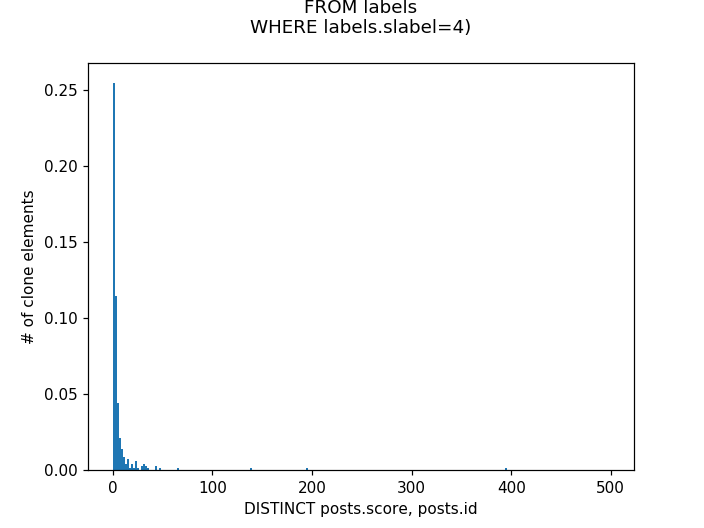

In [21]:
ax = plt.gca()
filter_str = """labels.slabel=2
AND labels.postid NOT IN (
SELECT DISTINCT postid
FROM labels
WHERE labels.slabel=4)
"""
plot_hist(ax, "DISTINCT posts.score, posts.id", filter_str, 
          bins=range(0,500, 2), density=True)

<IPython.core.display.Javascript object>


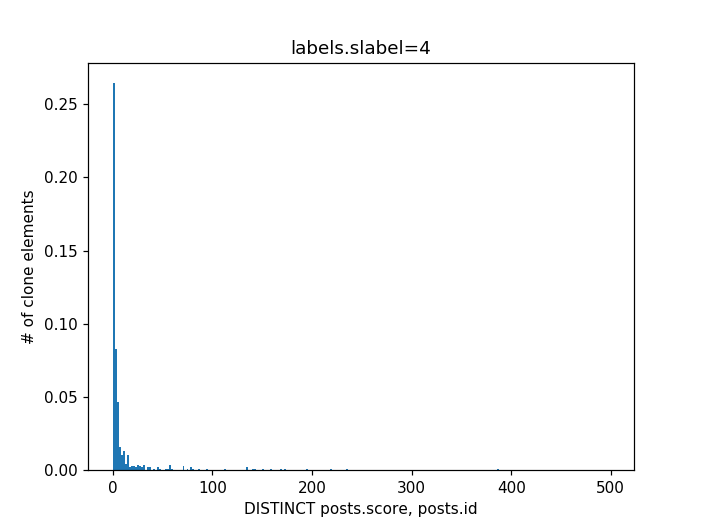

In [22]:
ax = plt.gca()
filter_str = """labels.slabel=4"""
plot_hist(ax, "DISTINCT posts.score, posts.id", filter_str, 
          bins=range(0,500, 2), density=True)

<IPython.core.display.Javascript object>


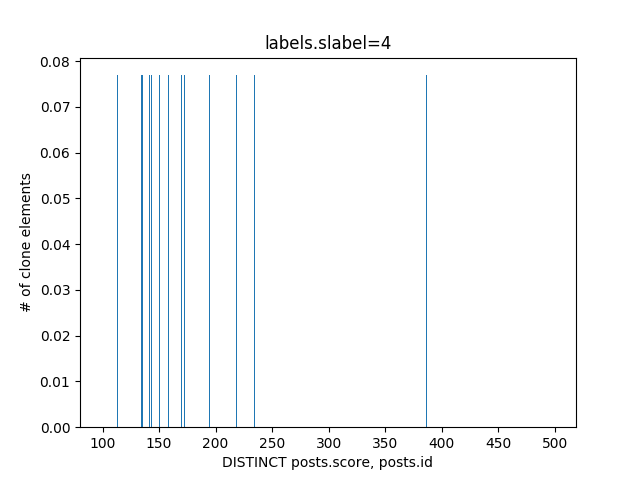

In [95]:
ax = plt.gca()
plot_hist(ax, "DISTINCT posts.score, posts.id", "labels.slabel=4", bins=range(100,500,1), density=True)

<IPython.core.display.Javascript object>


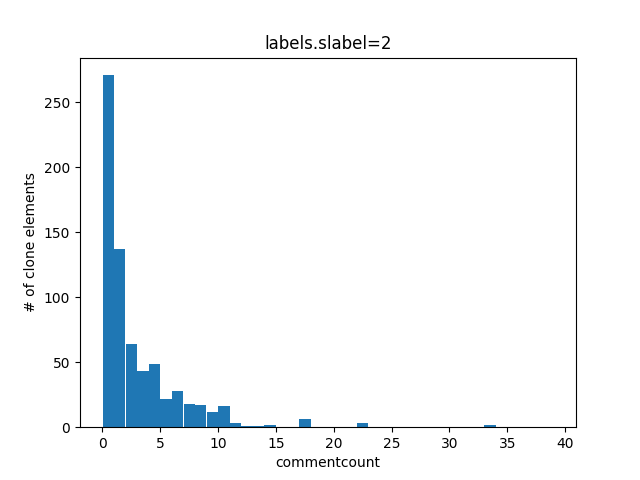

In [97]:
ax = plt.gca()
plot_hist_commentcount(ax, "labels.slabel=2", bins=range(0,40,1))

<IPython.core.display.Javascript object>


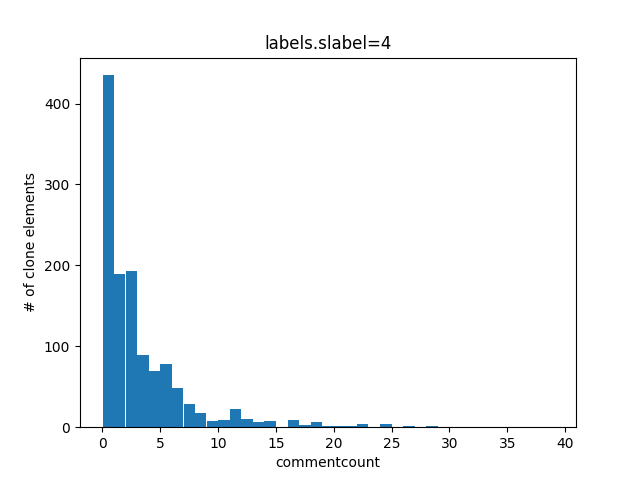

In [98]:
ax = plt.gca()
plot_hist_commentcount(ax, "labels.slabel=4", bins=range(0,40,1))

<IPython.core.display.Javascript object>


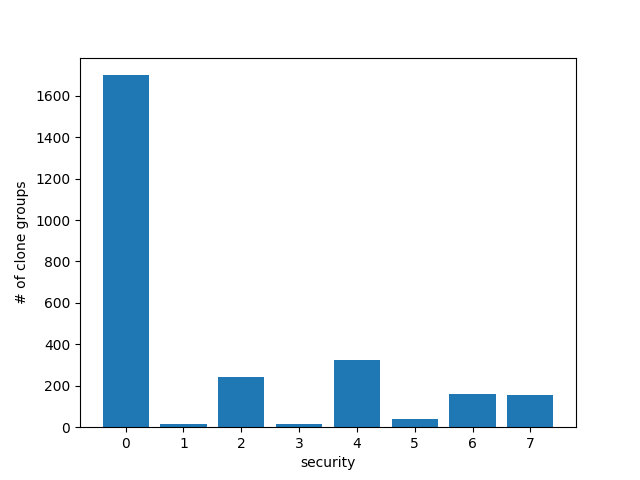

In [282]:
ax = plt.gca()
plot_n_groups_vs_slabel(ax, range(0,8))

<IPython.core.display.Javascript object>


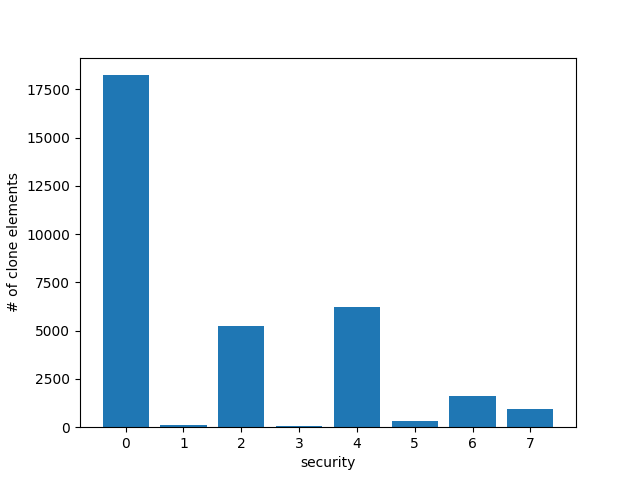

In [284]:
ax = plt.gca()
plot_n_elements_vs_slabel(ax, range(0,8))

<IPython.core.display.Javascript object>


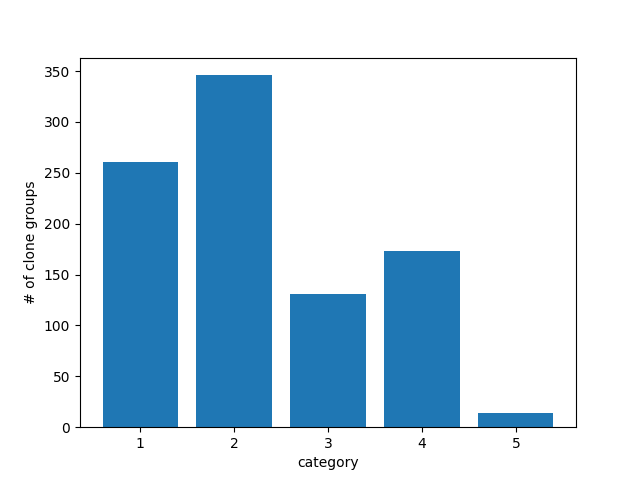

In [233]:
ax = plt.gca()
plot_n_groups_vs_scategory(ax)

<IPython.core.display.Javascript object>


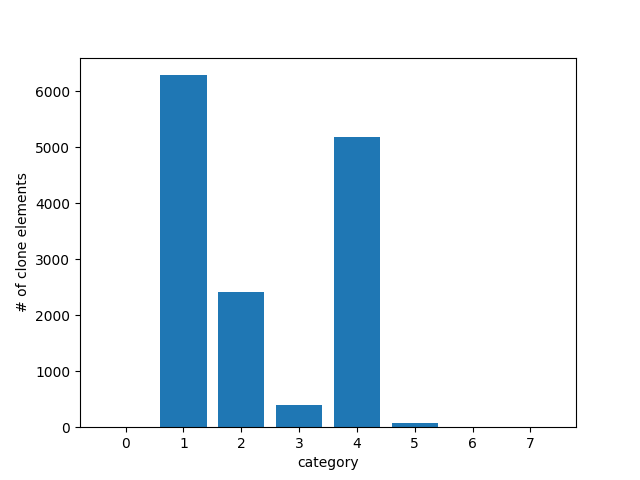

In [283]:
ax = plt.gca()
plot_n_elements_vs_scategory(ax)

In [133]:
def select_cids(tb_name_suffix, filterstr, connect_str):
    """Example filterstr: p.code0 LIKE '%.setSeed%'"""
    with psycopg2.connect(connect_str) as conn:
        cursor = conn.cursor()
        #sql = """SELECT DISTINCT cid FROM clone_pairs_%s %s ORDER BY cid""" % (tb_name_suffix, filterstr)
        #filterstr = 'AND '+filterstr if filterstr != '' else ''
        sql = """SELECT DISTINCT p.cid, p.code0
FROM labels 
INNER JOIN clone_pairs_%s p
ON labels.postid  = p.postid0
  AND labels.indx = p.indx0
  AND labels.tbegin = p.tbegin0
  AND labels.tend = p.tend0
WHERE %s
;
""" % (tb_name_suffix, filterstr)
        cursor.execute(sql)
        rows = cursor.fetchall()
        cids = [row[0] for row in rows]
        return cids    

# Neo4j

In [751]:
len(cgraph.get_unique_postids(dbinfo.tb_name_suffix, dbinfo.connect_str, 'TRUE'))

3562

In [752]:
len(cgraph.get_unique_qids(dbinfo.tb_name_suffix, dbinfo.connect_str, 'TRUE'))

3184

In [781]:
cgraph.n_cln_clsss("TRUE") 

2657

In [782]:
cgraph.test_n_summary()

We labeled:
2657 clone groups
8690 clone elements
3562 answer posts
3184 question posts


In [867]:
a = labeled.cln_clss_sizes(labeled.is_secure_clninst(), include_cid=True)
b = labeled.cln_clss_sizes(labeled.is_insecure_clninst(), include_cid=True)

In [869]:
max(a)

(4156, 5461)

In [868]:
sorted(b)[0:30]

[(1, 1069),
 (1, 7396),
 (1, 10548),
 (1, 11420),
 (1, 11989),
 (1, 13653),
 (1, 15024),
 (1, 15724),
 (1, 16014),
 (1, 16691),
 (1, 17761),
 (1, 17762),
 (1, 17763),
 (1, 18403),
 (1, 19920),
 (1, 20074),
 (1, 20936),
 (2, 262),
 (2, 368),
 (2, 574),
 (2, 737),
 (2, 827),
 (2, 831),
 (2, 840),
 (2, 852),
 (2, 853),
 (2, 888),
 (2, 1014),
 (2, 1070),
 (2, 1197)]

In [856]:
max(b)

974

<IPython.core.display.Javascript object>


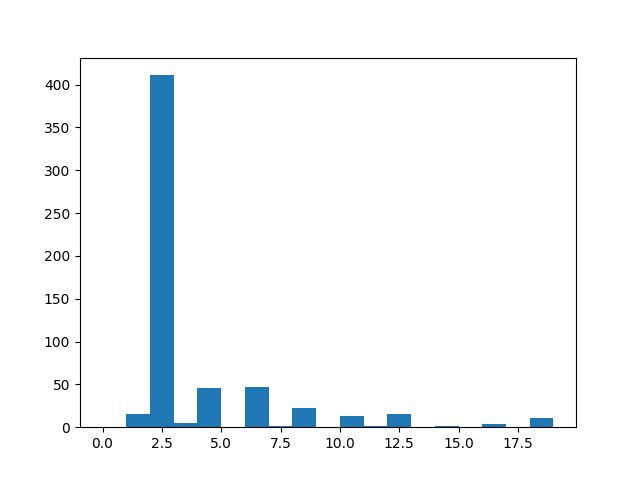

In [842]:
ax = plt.gca()
plotter.group_size_hist(ax, labeled.is_secure_clninst(), bins=range(0,20))

<IPython.core.display.Javascript object>


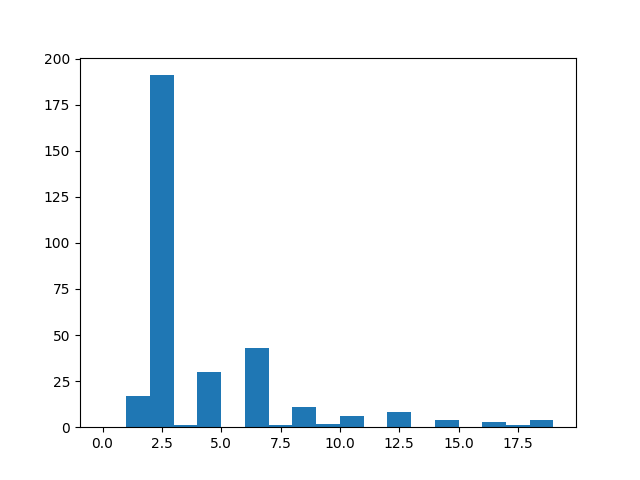

In [841]:
ax = plt.gca()
plotter.group_size_hist(ax, labeled.is_insecure_clninst(), bins=range(0,20))

In [829]:
labeled.cln_clss_sizes("TRUE")

[(7, 2),
 (8, 6),
 (18, 2),
 (20, 2),
 (21, 2),
 (24, 6),
 (46, 2),
 (54, 2),
 (76, 2),
 (83, 2),
 (84, 2),
 (93, 2),
 (99, 12),
 (100, 2),
 (123, 2),
 (128, 18),
 (131, 18),
 (134, 18),
 (137, 18),
 (140, 44),
 (159, 2),
 (229, 2),
 (232, 4),
 (239, 18),
 (252, 2),
 (260, 2),
 (262, 2),
 (323, 2),
 (324, 2),
 (339, 8),
 (341, 8),
 (343, 8),
 (345, 20),
 (360, 2),
 (368, 2),
 (371, 4),
 (386, 2),
 (430, 2),
 (445, 6),
 (458, 2),
 (471, 2),
 (522, 2),
 (523, 2),
 (524, 2),
 (525, 2),
 (526, 2),
 (527, 2),
 (528, 2),
 (529, 2),
 (556, 10),
 (574, 2),
 (582, 2),
 (588, 2),
 (594, 2),
 (648, 2),
 (660, 2),
 (709, 2),
 (737, 2),
 (743, 2),
 (752, 2),
 (754, 2),
 (765, 8),
 (782, 2),
 (819, 6),
 (820, 2),
 (825, 2),
 (827, 2),
 (831, 2),
 (840, 2),
 (842, 2),
 (849, 2),
 (851, 4),
 (852, 2),
 (853, 2),
 (864, 2),
 (888, 2),
 (908, 2),
 (909, 98),
 (911, 2),
 (919, 2),
 (963, 12),
 (964, 2),
 (965, 8),
 (976, 8),
 (978, 2),
 (979, 2),
 (984, 2),
 (998, 2),
 (1014, 2),
 (1029, 2),
 (1050, 30),

In [818]:
labeled.n_answer_posts("TRUE")

3562

In [794]:
filter_str = """TRUE"""
cgraph.clear_all()
cgraph.create_cid_nodes(filter_str)

In [795]:
cgraph.create_question_nodes(filter_str)

In [796]:
cgraph.create_answer_nodes(filter_str)

In [797]:
cgraph.create_snippet_nodes(filter_str)

In [798]:
cgraph.create_instance_nodes(filter_str)

In [810]:
cgraph.create_user_nodes(filter_str)

there are 24 answers that don't have owner
657590 doesn't have owner
1179672 doesn't have owner
1232591 doesn't have owner
2309561 doesn't have owner
3423306 doesn't have owner
3569952 doesn't have owner
4454943 doesn't have owner
5163405 doesn't have owner
7202987 doesn't have owner
8395877 doesn't have owner
8747556 doesn't have owner
9024167 doesn't have owner
9551368 doesn't have owner
11646344 doesn't have owner
11934216 doesn't have owner
13245771 doesn't have owner
13448079 doesn't have owner
14191224 doesn't have owner
15617210 doesn't have owner
17009311 doesn't have owner
17620825 doesn't have owner
17638558 doesn't have owner
19954309 doesn't have owner
20204491 doesn't have owner
20655294 doesn't have owner
22274480 doesn't have owner
22275908 doesn't have owner
22952964 doesn't have owner
23769407 doesn't have owner
25842447 doesn't have owner
26192965 doesn't have owner
26613144 doesn't have owner
27123370 doesn't have owner
27765016 doesn't have owner
28087510 doesn't ha

In [812]:
cgraph.n_users("TRUE")

5395

In [821]:
cgraph.n_answerers("TRUE")

2853

In [824]:
cgraph.n_askers("TRUE")

3015

In [819]:
labeled.n_answerers("TRUE")

2853

In [820]:
labeled.n_askers("TRUE")

3015

In [121]:
clones.ClnInst(7523169, 0, 294, 361)


```java
            decoded = aesCipher2.doFinal(Coded);

            /* byte[] --> char[] kai ektypwsh*/
            deco2 = new char[decoded.length];
            for(int i=0;i<decoded.length;i++)
                deco2[i] = (char)decoded[i];
            System.out.println("Test Decrypt: " + new String(deco2));
```


(8, 2, '', '')


In [122]:
clones.ClnInst(7523169, 0, 206, 273)


```java
            Coded = aesCipher.doFinal(toCode2);

            /* byte[] --> char[] kai ektypwsh*/
            Coded2 = new char[Coded.length];
            for(int i=0;i<Coded.length;i++)
                Coded2[i] = (char)Coded[i];
            System.out.println("Test Encrypt: " + new String(Coded2));


```


(8, 2, '', '')


In [442]:
clones.ClnClss(5438)

Clone group cid: 5438, containing 27 clone elements=========
----1/27----
http://stackoverflow.com/questions/11194217




```java
        MySSLSocketFactory sf = new MySSLSocketFactory(trustStore);
        sf.setHostnameVerifier(MySSLSocketFactory.ALLOW_ALL_HOSTNAME_VERIFIER);

        HttpParams params = new BasicHttpParams();
        HttpProtocolParams.setVersion(params, HttpVersion.HTTP_1_1);
        HttpProtocolParams.setContentCharset(params, HTTP.UTF_8);

        SchemeRegistry registry = new SchemeRegistry();
        registry.register(new Scheme("http", PlainSocketFactory.getSocketFactory(), 80));
        registry.register(new Scheme("https", sf, 443));

        ClientConnectionManager ccm = new ThreadSafeClientConnManager(params, registry);

        return new DefaultHttpClient(ccm, params);
```


----2/27----
http://stackoverflow.com/questions/43846839




```java
            MySSLSocketFactory sf = new MySSLSocketFactory(trustStore);
            sf.setHostnameVerifier(SSLSocketFactory.ALLOW_ALL_HOSTNAME_VERIFIER);

            HttpParams params = new BasicHttpParams();
            HttpProtocolParams.setVersion(params, HttpVersion.HTTP_1_1);
            HttpProtocolParams.setContentCharset(params, HTTP.UTF_8);

            SchemeRegistry registry = new SchemeRegistry();
            registry.register(new Scheme("http", PlainSocketFactory.getSocketFactory(), 80));
            registry.register(new Scheme("https", sf, 443));

            ClientConnectionManager ccm = new ThreadSafeClientConnManager(params, registry);
            return new DefaultHttpClient(ccm, params);
```


----3/27----
http://stackoverflow.com/questions/4837230




```java
        MySSLSocketFactory sf = new MySSLSocketFactory(trustStore);
        sf.setHostnameVerifier(SSLSocketFactory.ALLOW_ALL_HOSTNAME_VERIFIER);

        HttpParams params = new BasicHttpParams();
        HttpProtocolParams.setVersion(params, HttpVersion.HTTP_1_1);
        HttpProtocolParams.setContentCharset(params, HTTP.UTF_8);

        SchemeRegistry registry = new SchemeRegistry();
        registry.register(new Scheme("http", PlainSocketFactory.getSocketFactory(), 80));
        registry.register(new Scheme("https", sf, 443));

        ClientConnectionManager ccm = new ThreadSafeClientConnManager(params, registry);

        return new DefaultHttpClient(ccm, params);
```


----4/27----
http://stackoverflow.com/questions/12534921




```java
            SSLSocketFactory sf = new CSRSSLSocketFactory(trustStore);
            sf.setHostnameVerifier(SSLSocketFactory.ALLOW_ALL_HOSTNAME_VERIFIER);

            HttpParams params = new BasicHttpParams();
            HttpProtocolParams.setVersion(params, HttpVersion.HTTP_1_1);
            HttpProtocolParams.setContentCharset(params, HTTP.UTF_8);

            SchemeRegistry registry = new SchemeRegistry();
            registry.register(new Scheme("http", PlainSocketFactory.getSocketFactory(), 80));
            registry.register(new Scheme("https", sf, 443));

            ClientConnectionManager ccm = new ThreadSafeClientConnManager(params, registry);

            return new DefaultHttpClient(ccm, params);
```


----5/27----
http://stackoverflow.com/questions/31310087




```java
                        SSLSocketFactory sf = new MySSLSocketFactory(trustStore);
                        sf.setHostnameVerifier(SSLSocketFactory.ALLOW_ALL_HOSTNAME_VERIFIER);

                        HttpParams params = new BasicHttpParams();
                        HttpProtocolParams.setVersion(params, HttpVersion.HTTP_1_1);
                        HttpProtocolParams.setContentCharset(params, HTTP.UTF_8);

                        SchemeRegistry registry = new SchemeRegistry();
                        registry.register(new Scheme("http", PlainSocketFactory.getSocketFactory(), 80));
                        registry.register(new Scheme("https", sf, 443));

                        ClientConnectionManager ccm = new ThreadSafeClientConnManager(params, registry);

                        return new DefaultHttpClient(ccm, params);
```


----6/27----
http://stackoverflow.com/questions/26804009




```java
            SSLSocketFactory sf = new MySSLSocketFactory(trustStore);
            sf.setHostnameVerifier(SSLSocketFactory.ALLOW_ALL_HOSTNAME_VERIFIER);

            HttpParams params = new BasicHttpParams();
            HttpProtocolParams.setVersion(params, HttpVersion.HTTP_1_1);
            HttpProtocolParams.setContentCharset(params, HTTP.UTF_8);

            SchemeRegistry registry = new SchemeRegistry();
            registry.register(new Scheme("http", PlainSocketFactory.getSocketFactory(), 80));
            registry.register(new Scheme("https", sf, 443));

            ClientConnectionManager ccm = new ThreadSafeClientConnManager(params, registry);

            return new DefaultHttpClient(ccm, params);
```


----7/27----
http://stackoverflow.com/questions/28233537




```java
            SSLSocketFactory sf = new MySSLSocketFactory(trustStore);
            sf.setHostnameVerifier(SSLSocketFactory.ALLOW_ALL_HOSTNAME_VERIFIER);

            HttpParams params = new BasicHttpParams();
            HttpProtocolParams.setVersion(params, HttpVersion.HTTP_1_1);
            HttpProtocolParams.setContentCharset(params, HTTP.UTF_8);

            SchemeRegistry registry = new SchemeRegistry();
            registry.register(new Scheme("http", PlainSocketFactory.getSocketFactory(), 80));
            registry.register(new Scheme("https", sf, 443));

            ClientConnectionManager ccm = new ThreadSafeClientConnManager(params, registry);

            return new DefaultHttpClient(ccm, params);
```


----8/27----
http://stackoverflow.com/questions/15157327




```java
            SSLSocketFactory sf = new MySSLSocketFactory(trustStore);
            sf.setHostnameVerifier(SSLSocketFactory.ALLOW_ALL_HOSTNAME_VERIFIER);

            HttpParams params = new BasicHttpParams();
            HttpProtocolParams.setVersion(params, HttpVersion.HTTP_1_1);
            HttpProtocolParams.setContentCharset(params, HTTP.UTF_8);

            SchemeRegistry registry = new SchemeRegistry();
            registry.register(new Scheme("http", PlainSocketFactory
                    .getSocketFactory(), 80));
            registry.register(new Scheme("https", sf, 443));

            ClientConnectionManager ccm = new ThreadSafeClientConnManager(
                    params, registry);

            return new DefaultHttpClient(ccm, params);
```


----9/27----
http://stackoverflow.com/questions/18371429




```java
            SSLSocketFactory sf = new MySSLSocketFactory(trustStore);
            sf.setHostnameVerifier(SSLSocketFactory.ALLOW_ALL_HOSTNAME_VERIFIER);

            HttpParams params = new BasicHttpParams();
            HttpProtocolParams.setVersion(params, HttpVersion.HTTP_1_1);
            HttpProtocolParams.setContentCharset(params, HTTP.UTF_8);

            SchemeRegistry registry = new SchemeRegistry();
            registry.register(new Scheme("http", PlainSocketFactory
                    .getSocketFactory(), 80));
            registry.register(new Scheme("https", sf, 443));

            ClientConnectionManager ccm = new ThreadSafeClientConnManager(
                    params, registry);

            return new DefaultHttpClient(ccm, params);
```


----10/27----
http://stackoverflow.com/questions/15843381




```java
            SSLSocketFactory sf = new MySSLSocketFactory(trustStore);
            sf.setHostnameVerifier(SSLSocketFactory.ALLOW_ALL_HOSTNAME_VERIFIER);

            HttpParams params = new BasicHttpParams();
            HttpProtocolParams.setVersion(params, HttpVersion.HTTP_1_1);
            HttpProtocolParams.setContentCharset(params, HTTP.UTF_8);

            SchemeRegistry registry = new SchemeRegistry();
            registry.register(new Scheme("http", PlainSocketFactory
                    .getSocketFactory(), 80));
            registry.register(new Scheme("https", sf, 443));



            ClientConnectionManager ccm = new ThreadSafeClientConnManager(
                    params, registry);

            return new DefaultHttpClient(ccm, params);
```


----11/27----
http://stackoverflow.com/questions/15878972




```java
            SSLSocketFactory sf = new MySSLSocketFactory(trustStore);
            sf.setHostnameVerifier(SSLSocketFactory.ALLOW_ALL_HOSTNAME_VERIFIER);

            HttpParams params = new BasicHttpParams();
            HttpProtocolParams.setVersion(params, HttpVersion.HTTP_1_1);
            HttpProtocolParams.setContentCharset(params, HTTP.UTF_8);

            SchemeRegistry registry = new SchemeRegistry();
            registry.register(new Scheme("http", PlainSocketFactory
                    .getSocketFactory(), 80));
            registry.register(new Scheme("https", sf, 443));



            ClientConnectionManager ccm = new ThreadSafeClientConnManager(
                    params, registry);

            return new DefaultHttpClient(ccm, params);
```


----12/27----
http://stackoverflow.com/questions/24013606




```java
         SSLSocketFactory sf = new MySSLSocketFactory(trustStore);
         sf.setHostnameVerifier(SSLSocketFactory.ALLOW_ALL_HOSTNAME_VERIFIER);

         HttpParams params = new BasicHttpParams();
         HttpProtocolParams.setVersion(params, HttpVersion.HTTP_1_1);
         HttpProtocolParams.setContentCharset(params, HTTP.UTF_8);

         SchemeRegistry registry = new SchemeRegistry();
         registry.register(new Scheme("http", PlainSocketFactory.getSocketFactory(), 80));
         registry.register(new Scheme("https", sf, 443));

         ClientConnectionManager ccm = new ThreadSafeClientConnManager(params, registry);

         return new DefaultHttpClient(ccm, params);
```


----13/27----
http://stackoverflow.com/questions/20989370




```java
        SSLSocketFactory sf = new MySSLSocketFactory(trustStore);
        sf.setHostnameVerifier(SSLSocketFactory.ALLOW_ALL_HOSTNAME_VERIFIER);
        HttpParams params = new BasicHttpParams();
        HttpProtocolParams.setVersion(params, HttpVersion.HTTP_1_1);
        HttpProtocolParams.setContentCharset(params, HTTP.UTF_8);
        SchemeRegistry registry = new SchemeRegistry();
        registry.register(new Scheme("http", PlainSocketFactory.getSocketFactory(), 80));
        registry.register(new Scheme("https", sf, 443));

        ClientConnectionManager ccm = new ThreadSafeClientConnManager(params, registry);

        return new DefaultHttpClient(ccm, params);

```


----14/27----
http://stackoverflow.com/questions/14276261




```java
        SSLSocketFactory sf = new MySSLSocketFactory(trustStore);
        sf.setHostnameVerifier(SSLSocketFactory.ALLOW_ALL_HOSTNAME_VERIFIER);

        HttpParams params = new BasicHttpParams();
        HttpProtocolParams.setVersion(params, HttpVersion.HTTP_1_1);
        HttpProtocolParams.setContentCharset(params, HTTP.UTF_8);

        SchemeRegistry registry = new SchemeRegistry();
        registry.register(new Scheme("http", PlainSocketFactory.getSocketFactory(), 80));
        registry.register(new Scheme("https", sf, 443));

        ClientConnectionManager ccm = new ThreadSafeClientConnManager(params, registry);
        return new DefaultHttpClient(ccm, params);
```


----15/27----
http://stackoverflow.com/questions/8223757




```java
        SSLSocketFactory sf = new MySSLSocketFactory(trustStore);
        sf.setHostnameVerifier(SSLSocketFactory.ALLOW_ALL_HOSTNAME_VERIFIER);

        HttpParams params = new BasicHttpParams();
        HttpProtocolParams.setVersion(params, HttpVersion.HTTP_1_1);
        HttpProtocolParams.setContentCharset(params, HTTP.UTF_8);

        SchemeRegistry registry = new SchemeRegistry();
        registry.register(new Scheme("http", PlainSocketFactory.getSocketFactory(), 80));
        registry.register(new Scheme("https", sf, 443));

        ClientConnectionManager ccm = new ThreadSafeClientConnManager(params, registry);

        return new DefaultHttpClient(ccm, params);
```


----16/27----
http://stackoverflow.com/questions/11293498




```java
        SSLSocketFactory sf = new MySSLSocketFactory(trustStore);
        sf.setHostnameVerifier(SSLSocketFactory.ALLOW_ALL_HOSTNAME_VERIFIER);

        HttpParams params = new BasicHttpParams();
        HttpProtocolParams.setVersion(params, HttpVersion.HTTP_1_1);
        HttpProtocolParams.setContentCharset(params, HTTP.UTF_8);

        SchemeRegistry registry = new SchemeRegistry();
        registry.register(new Scheme("http", PlainSocketFactory.getSocketFactory(), 80));
        registry.register(new Scheme("https", sf, 443));

        ClientConnectionManager ccm = new ThreadSafeClientConnManager(params, registry);

        return new DefaultHttpClient(ccm, params);
```


----17/27----
http://stackoverflow.com/questions/16508187




```java
        SSLSocketFactory sf = new MySSLSocketFactory(trustStore);
        sf.setHostnameVerifier(SSLSocketFactory.ALLOW_ALL_HOSTNAME_VERIFIER);

        HttpParams params = new BasicHttpParams();
        HttpProtocolParams.setVersion(params, HttpVersion.HTTP_1_1);
        HttpProtocolParams.setContentCharset(params, HTTP.UTF_8);

        SchemeRegistry registry = new SchemeRegistry();
        registry.register(new Scheme("http", PlainSocketFactory.getSocketFactory(), 80));
        registry.register(new Scheme("https", sf, 443));

        ClientConnectionManager ccm = new ThreadSafeClientConnManager(params, registry);

        return new DefaultHttpClient(ccm, params);
```


----18/27----
http://stackoverflow.com/questions/16734015




```java
        SSLSocketFactory sf = new MySSLSocketFactory(trustStore);
        sf.setHostnameVerifier(SSLSocketFactory.ALLOW_ALL_HOSTNAME_VERIFIER);

        HttpParams params = new BasicHttpParams();
        HttpProtocolParams.setVersion(params, HttpVersion.HTTP_1_1);
        HttpProtocolParams.setContentCharset(params, HTTP.UTF_8);

        SchemeRegistry registry = new SchemeRegistry();
        registry.register(new Scheme("http", PlainSocketFactory.getSocketFactory(), 80));
        registry.register(new Scheme("https", sf, 443));

        ClientConnectionManager ccm = new ThreadSafeClientConnManager(params, registry);

        return new DefaultHttpClient(ccm, params);
```


----19/27----
http://stackoverflow.com/questions/17702591




```java
        SSLSocketFactory sf = new MySSLSocketFactory(trustStore);
        sf.setHostnameVerifier(SSLSocketFactory.ALLOW_ALL_HOSTNAME_VERIFIER);

        HttpParams params = new BasicHttpParams();
        HttpProtocolParams.setVersion(params, HttpVersion.HTTP_1_1);
        HttpProtocolParams.setContentCharset(params, HTTP.UTF_8);

        SchemeRegistry registry = new SchemeRegistry();
        registry.register(new Scheme("http", PlainSocketFactory.getSocketFactory(), 80));
        registry.register(new Scheme("https", sf, 443));

        ClientConnectionManager ccm = new ThreadSafeClientConnManager(params, registry);

        return new DefaultHttpClient(ccm, params);
```


----20/27----
http://stackoverflow.com/questions/25418908




```java
        SSLSocketFactory sf = new MySSLSocketFactory(trustStore);
        sf.setHostnameVerifier(SSLSocketFactory.ALLOW_ALL_HOSTNAME_VERIFIER);

        HttpParams params = new BasicHttpParams();
        HttpProtocolParams.setVersion(params, HttpVersion.HTTP_1_1);
        HttpProtocolParams.setContentCharset(params, HTTP.UTF_8);

        SchemeRegistry registry = new SchemeRegistry();
        registry.register(new Scheme("http", PlainSocketFactory.getSocketFactory(), 80));
        registry.register(new Scheme("https", sf, 443));

        ClientConnectionManager ccm = new ThreadSafeClientConnManager(params, registry);

        return new DefaultHttpClient(ccm, params);
```


----21/27----
http://stackoverflow.com/questions/27706920




```java
        SSLSocketFactory sf = new MySSLSocketFactory(trustStore);
        sf.setHostnameVerifier(SSLSocketFactory.ALLOW_ALL_HOSTNAME_VERIFIER);

        HttpParams params = new BasicHttpParams();
        HttpProtocolParams.setVersion(params, HttpVersion.HTTP_1_1);
        HttpProtocolParams.setContentCharset(params, HTTP.UTF_8);

        SchemeRegistry registry = new SchemeRegistry();
        registry.register(new Scheme("http", PlainSocketFactory.getSocketFactory(), 80));
        registry.register(new Scheme("https", sf, 443));

        ClientConnectionManager ccm = new ThreadSafeClientConnManager(params, registry);

        return new DefaultHttpClient(ccm, params);
```


----22/27----
http://stackoverflow.com/questions/27841164




```java
        SSLSocketFactory sf = new MySSLSocketFactory(trustStore);
        sf.setHostnameVerifier(SSLSocketFactory.ALLOW_ALL_HOSTNAME_VERIFIER);

        HttpParams params = new BasicHttpParams();
        HttpProtocolParams.setVersion(params, HttpVersion.HTTP_1_1);
        HttpProtocolParams.setContentCharset(params, HTTP.UTF_8);

        SchemeRegistry registry = new SchemeRegistry();
        registry.register(new Scheme("http", PlainSocketFactory.getSocketFactory(), 80));
        registry.register(new Scheme("https", sf, 443));

        ClientConnectionManager ccm = new ThreadSafeClientConnManager(params, registry);

        return new DefaultHttpClient(ccm, params);
```


----23/27----
http://stackoverflow.com/questions/13812958




```java
        SSLSocketFactory sf = new MySSLSocketFactory(trustStore);
        sf.setHostnameVerifier(SSLSocketFactory.ALLOW_ALL_HOSTNAME_VERIFIER);

        HttpParams params = new BasicHttpParams();
        HttpProtocolParams.setVersion(params, HttpVersion.HTTP_1_1);
        HttpProtocolParams.setContentCharset(params, HTTP.UTF_8);

        SchemeRegistry registry = new SchemeRegistry();
        registry.register(new Scheme("http", PlainSocketFactory.getSocketFactory(), 80));
        registry.register(new Scheme("https", sf, 443));

        ClientConnectionManager ccm = new ThreadSafeClientConnManager(params, registry);

        return new DefaultHttpClient(ccm, params);

```


----24/27----
http://stackoverflow.com/questions/10725268




```java
       SSLSocketFactory sf = new MySSLSocketFactory(trustStore);
       sf.setHostnameVerifier(SSLSocketFactory.ALLOW_ALL_HOSTNAME_VERIFIER);

       HttpParams params = new BasicHttpParams();
       HttpProtocolParams.setVersion(params, HttpVersion.HTTP_1_1);
       HttpProtocolParams.setContentCharset(params, HTTP.UTF_8);

       SchemeRegistry registry = new SchemeRegistry();
       registry.register(new Scheme("http", PlainSocketFactory.getSocketFactory(), 80));
       registry.register(new Scheme("https", sf, 443));

       ClientConnectionManager ccm = new ThreadSafeClientConnManager(params, registry);

       return new DefaultHttpClient(ccm, params);
```


----25/27----
http://stackoverflow.com/questions/23893399




```java
 SSLSocketFactory sf = new MySSLSocketFactory(trustStore);
 sf.setHostnameVerifier(SSLSocketFactory.ALLOW_ALL_HOSTNAME_VERIFIER);

 HttpParams params = new BasicHttpParams();
 HttpProtocolParams.setVersion(params, HttpVersion.HTTP_1_1);
 HttpProtocolParams.setContentCharset(params, HTTP.UTF_8);

 SchemeRegistry registry = new SchemeRegistry();
 registry.register(new Scheme("http", PlainSocketFactory.getSocketFactory(), 80));
 registry.register(new Scheme("https", sf, 443));

 ClientConnectionManager ccm = new ThreadSafeClientConnManager(params, registry);

 return new DefaultHttpClient(ccm, params);
```


----26/27----
http://stackoverflow.com/questions/27513829




```java
        SSLSocketFactory sf = new RecorridoSSL(trustStore);
        sf.setHostnameVerifier(SSLSocketFactory.ALLOW_ALL_HOSTNAME_VERIFIER);

        HttpParams params = new BasicHttpParams();
        HttpProtocolParams.setVersion(params, HttpVersion.HTTP_1_1);
        HttpProtocolParams.setContentCharset(params, HTTP.UTF_8);

        SchemeRegistry registry = new SchemeRegistry();
        registry.register(new Scheme("http", PlainSocketFactory.getSocketFactory(), 80));
        registry.register(new Scheme("https", sf, 443));

        ClientConnectionManager ccm = new ThreadSafeClientConnManager(params, registry);

        return new DefaultHttpClient(ccm, params);
```


----27/27----
http://stackoverflow.com/questions/24594974




```java
        SSLSocketFactory sf = new TrustSSLSocketFactory(trustStore);
        sf.setHostnameVerifier(SSLSocketFactory.ALLOW_ALL_HOSTNAME_VERIFIER);

        HttpParams params = new BasicHttpParams();
        HttpProtocolParams.setVersion(params, HttpVersion.HTTP_1_1);
        HttpProtocolParams.setContentCharset(params, HTTP.UTF_8);

        SchemeRegistry registry = new SchemeRegistry();
        registry.register(new Scheme("http", PlainSocketFactory
                .getSocketFactory(), 80));
        registry.register(new Scheme("https", sf, 443));

        ClientConnectionManager ccm = new ThreadSafeClientConnManager(
                params, registry);

        return new DefaultHttpClient(ccm, params);

```


(4, 1, 'allow all hosts', '')


In [532]:
import scipy.stats as stats

In [540]:
a = [1,1,0,1,0,1,0,1,1,1,1,1,1]
b = [0,0,0,0,0,1,0,0,0,0,0,1,0]
stats.mannwhitneyu(a[:-3],b[:-3], alternative=None)

MannwhitneyuResult(statistic=20.0, pvalue=0.004335226377319083)

In [ ]:
def import_from_combined_view(tb_name_suffix, connect_str):
    slabel_postid = np.loadtxt("combined_view.csv", delimiter=',', skiprows=1)
    cids = set()
    with psycopg2.connect(connect_str) as conn:
        cursor = conn.cursor()
        for i in range(len(slabel_postid)):
            slabel = slabel_postid[i][0]
            postid = slabel_postid[i][1]   
            sql = """SELECT DISTINCT cid FROM clone_pairs_%s WHERE postid0=%d""" % (tb_name_suffix, postid)
            print(sql)
            cursor.execute(sql)
            rows = cursor.fetchall()
            if len(rows) == 1:
                cid = rows[0][0]
                cids.add(cid)
                #label_sql = """INSERT INTO labels_%s(cid, slabel) VALUES(%d, %d) ON CONFLICT(cid) DO UPDATE
#SET (cid, slabel) = (%d, %d);""" % (tb_name_suffix, cid, slabel, cid, slabel)
                #cursor.execute(label_sql)
            elif len(rows) >1:
                print("\n\n\n**************************")
                print("postid %d has %d clone groups" % (postid, len(rows)))
                print("please help to label the following:")
                cids = [row[0] for row in rows]
                label_ui(tb_name_suffix, cids, connect_str)
    print("%d snippets in combined view, they belong to %d clones groups in clone_pairs" 
           % (len(slabel_postid), len(cids)))